<a href="https://colab.research.google.com/github/kkartsen/AI_ISP/blob/main/AI_Bias_Mitigation_ISP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project utilizes a dataset that is frequently encountered in ML spaces and is comprised of census data, and therefore contains multiple social categories from which bias can arise. The version used here is from kaggle, a popular dataset repository.

##**Adding the Kaggle Dataset to Colab**


**Step 1.** Install kaggle python library

In [ ]:
! pip install -q kaggle

**Step 2.** Upload kaggle API key

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kkarts","key":"10a270b6ccdc28f467ec10d500830ec9"}'}

**Step 3.** Store kaggle API token in new kaggle folder

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

**Step 4.** Change file permissions for API key to r&w for owner

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

**Step 5.** Check connection to kaggle established and functioning

In [ ]:
! kaggle datasets list

ref                                                             title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
rohitgrewal/airlines-flights-data                               Airlines Flights Data                                  2440299  2025-07-29 09:16:00.463000          18254        353  1.0              
wasiqaliyasir/breast-cancer-dataset                             Breast cancer dataset                                    49830  2025-07-30 12:52:44.057000          10312        346  1.0              
kunshbhatia/delhi-air-quality-dataset                           Delhi Air Quality Dataset                                30430  2025-07-28 14:00:14.247000           6925        136  1.0              


**Step 6.** Download dataset

In [ ]:
! kaggle datasets download wenruliu/adult-income-dataset

Dataset URL: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
License(s): unknown
  0% 0.00/652k [00:00<?, ?B/s]
100% 652k/652k [00:00<00:00, 652MB/s]


**Step 7.** Unzip dataset

In [ ]:
! mkdir ds
! unzip adult-income-dataset.zip -d ds

Archive:  adult-income-dataset.zip
  inflating: ds/adult.csv            


##**Analyzing the Dataset**

In [ ]:
import pandas as pd

**Step 1.** Load the dataset into a pandas dataframe

In [ ]:
df = pd.read_csv("ds/adult.csv")

**Step 2.** Observe column headers and first instances

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


**Step 3.** Get number of rows and columns

In [ ]:
df.shape

(48842, 15)

**Step 4.** Get statistical information of dataset

In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**Step 5.** Get summary of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


There are 48,842 rows of data and each column contains 48,842 non-null values. This means there are no NaN values to account for. However, we can see in row 4 that some values are shown as '?', so not all values for all instances were collected. This should be taken into consideration to ensure it does not skew results, either because too many values in a column are '?', or because '?' values are unevenly distributed.

##**Cleaning the Dataset**

In [ ]:
import matplotlib.pyplot as plt # for data visualization

**Step 1.** Address rows with '?' values

**1a.** Find columns that have '?' values

**Note: only columns with '?' values are shown in this step*

In [ ]:
df['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [ ]:
df['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

**1b.** Check how many values in each of these four columns have '?' values

**Note: if many rows have a '?' in a particular column, it is likely a poor decision to purge them from the dataset, since this could result in too few instances to find reliable relationships between the data*

In [ ]:
(df['workclass'] == '?').sum()

np.int64(2799)

In [ ]:
(df['occupation'] == '?').sum()

np.int64(2809)

In [ ]:
(df['native-country'] == '?').sum()

np.int64(857)

While there are hundreds or thousands of rows with '?' values for each of these columns, they each make up a small portion of the overall dataset. Therefore, this information alone is not enough to determine with certainty that the rows with '?' values for these columns should be kept. For this reason, we move on to step 3c for each of these columns.

**1c.** Check if removing '?' values skews the data

**Note: if this is the case, purging rows containing '?' values could result in skewed data*

In [ ]:
#Step 3c(i). Filter the dataset to remove entries with a '?' in the workclass column
filter_workclass = df[df['workclass'] != '?']

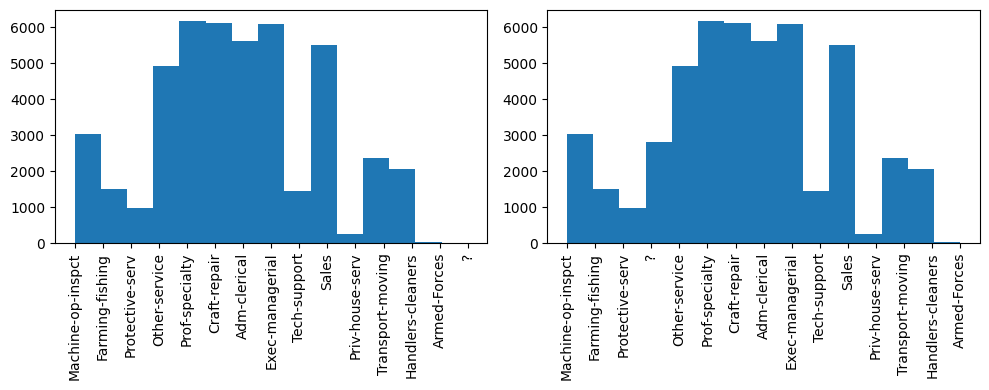

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(filter_workclass['occupation'], bins=15)
axes[0].tick_params(axis='x', rotation=90) # Rotate x-axis labels by 90 degrees
axes[1].hist(df['occupation'], bins=15)
axes[1].tick_params(axis='x', rotation=90) # Rotate x-axis labels by 90 degrees
plt.tight_layout()

While all other independent variables retain the shape of their distributions (not shown) when entries with unknown workclass are removed, plotting the occupation column as in the histograms above reveals that approximately all entries with unknown workclass also have unknown occupation. Note that the graph on the right, which uses the original dataset, shows almost 3000 '?' entries, while the graph on the left, which has entries with missing workclass removed, shows none. This means that these rows may not contain enough data to be valuable in training, and should be removed if the values cannot be filled in somewhat reliably through imputation.

In [ ]:
#Step 3c(i). Filter the dataset to remove entries with a '?' in the occupation column
filter_occupation = df[df['occupation'] != '?']

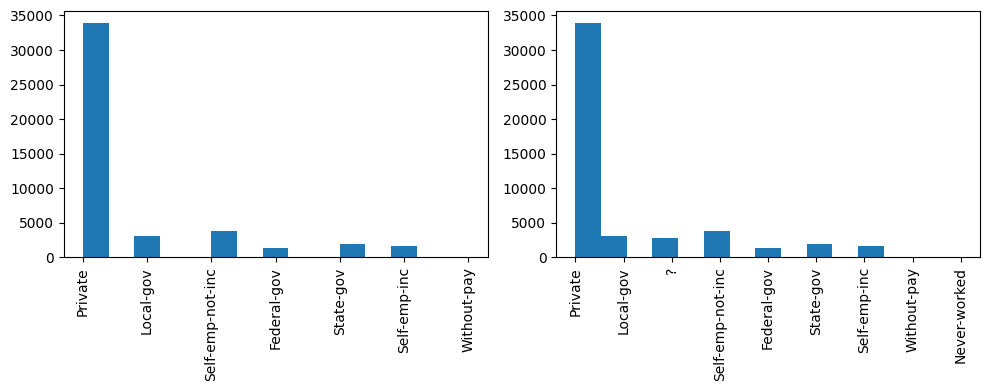

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(filter_occupation['workclass'], bins=15)
axes[0].tick_params(axis='x', rotation=90) # Rotate x-axis labels by 90 degrees
axes[1].hist(df['workclass'], bins=15)
axes[1].tick_params(axis='x', rotation=90) # Rotate x-axis labels by 90 degrees
plt.tight_layout()

Checking against the occupation column reveals the same information as checking against the workclass column did. This makes sense since the entries removed are generally the same in both cases.

In [ ]:
#Step 3c(i). Filter the dataset to remove entries with a '?' in the workclass column
filter_nativecountry = df[df['native-country'] != '?']

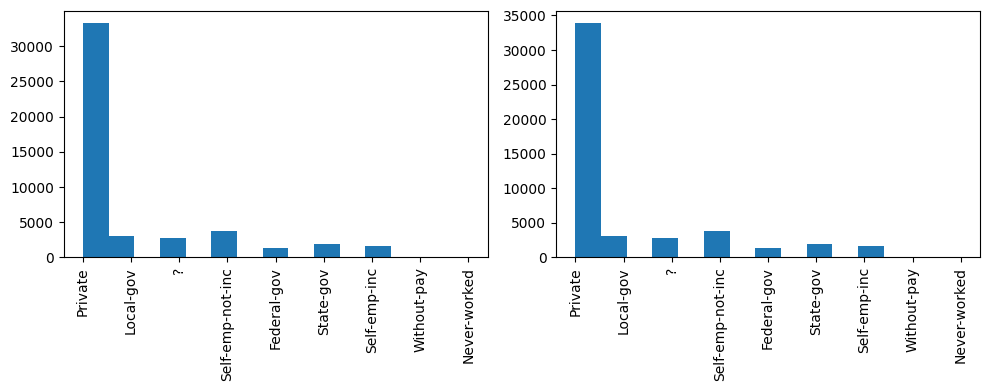

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(filter_nativecountry['workclass'], bins=15)
axes[0].tick_params(axis='x', rotation=90) # Rotate x-axis labels by 90 degrees
axes[1].hist(df['workclass'], bins=15)
axes[1].tick_params(axis='x', rotation=90) # Rotate x-axis labels by 90 degrees
plt.tight_layout()

From this histogram, we can see that the rows with missing values for native-country did not significantly overlap with rows with missing values for workclass. Neither did these rows overlap with rows with missing values for occupation, nor did removing these rows affect the distribution of data.

Based on these results, and the impractibility of data imputation in this particular case, we can determine that the best course of action is to remove the entries with '?' values.

**1d.** Clean the data of rows that contain '?' (missing) values

In [ ]:
df = df[df['workclass'] != '?']
df = df[df['occupation'] != '?']
df = df[df['native-country'] != '?']

**Step 2.** Clean the data of columns with bad or not useful data

Analysis of the capital-gain and capital-loss columns shows that 92% and 95% of their values are 0, respectively. Therefore, these columns are not useful and should be purged from the dataframe

In [ ]:
(df['capital-gain'] == 0).sum() / df.shape[0]

np.float64(0.91619123435496)

In [ ]:
(df['capital-loss'] == 0).sum() / df.shape[0]

np.float64(0.9526779001371014)

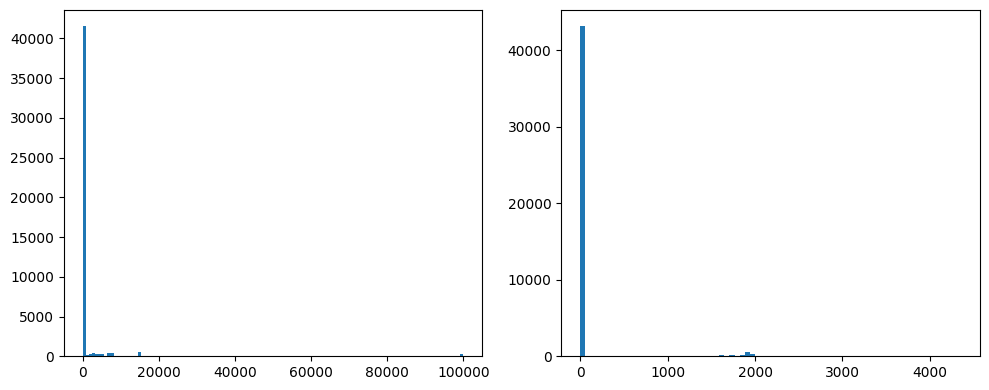

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
#ax.tick_params(axis='x', rotation=45) # Rotate x-axis labels by 45 degrees
axes[0].hist(df['capital-gain'], bins=123)
axes[1].hist(df['capital-loss'], bins=74)
plt.tight_layout()

In [ ]:
df.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)

The fnlwgt column is the number of people within the population a datapoint is believed to represent. While this value is important for population analysis, it is not directly helpful for making predictions about individual income, which is what the ML model will do. Therefore, this column is also removed.

In [ ]:
df.drop(['fnlwgt'], axis=1, inplace=True)

##**Preprocessing the Data**

Before the model can be run on the dataset and metrics used for analysis, the data must be formatted in a way to make it compatible

In [ ]:
from sklearn.preprocessing import OneHotEncoder

**Step 1.** Change data label values from object type to boolean type

The job of the model is to predict the value of the income column for each instance. Currently, the possible income values are '<=50K' and '>50K'. In order to use the fairness metrics effectively, the predictions should be positive or negative. To do that, this column will be changed to boolean values where income is positive if >50K or negative if <=50K.

In [ ]:
df['income'] = df['income'] == '>50K'

In [ ]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,False
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,False
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,True
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,True
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,False


**Step 2.** Change ordinal categorical data types to numerical data types

The educational-num column represents the same data in the the education column, but in numeric form. This is possible because level of education is ordinal data, from least to most. Since both columns contain the same information and the model requires numerical data in order to be run on a traditional computer, the education column is dropped.

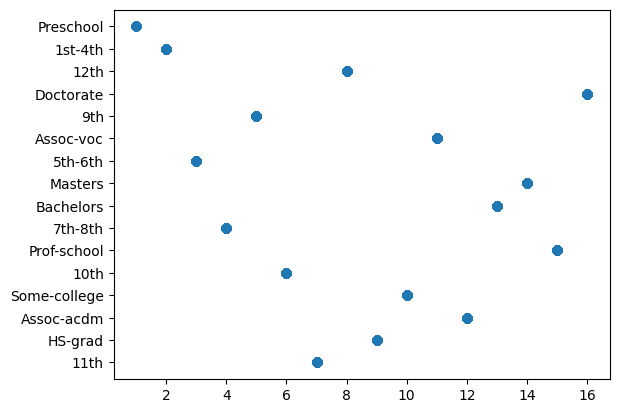

In [ ]:
X = df['educational-num']
Y = df['education']

plt.scatter(X, Y)

In [ ]:
df.drop(['education'], axis=1, inplace=True)

**Step 3.** Change nominal categorical data types to numerical data types

In [ ]:
#Use OneHotEncoder for conversion without introducing bias or ordering nominal data
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas') #set output to dataframe instead of sparse matrix

#transform categorical data to numerical data for each relevant column
ohe_workclass = ohe.fit_transform(df[['workclass']])
ohe_marital = ohe.fit_transform(df[['marital-status']])
ohe_occupation = ohe.fit_transform(df[['occupation']])
ohe_relationship = ohe.fit_transform(df[['relationship']])
ohe_race = ohe.fit_transform(df[['race']])
ohe_gender = ohe.fit_transform(df[['gender']])
ohe_native = ohe.fit_transform(df[['native-country']])

#add one-hot columns to dataframe
df = pd.concat([df, ohe_workclass, ohe_marital, ohe_occupation, ohe_relationship, ohe_race, ohe_gender, ohe_native], axis=1)

#drop categorical columns from dataframe
df.drop(['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 86 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        45222 non-null  int64  
 1   educational-num                            45222 non-null  int64  
 2   hours-per-week                             45222 non-null  int64  
 3   income                                     45222 non-null  bool   
 4   workclass_Federal-gov                      45222 non-null  float64
 5   workclass_Local-gov                        45222 non-null  float64
 6   workclass_Private                          45222 non-null  float64
 7   workclass_Self-emp-inc                     45222 non-null  float64
 8   workclass_Self-emp-not-inc                 45222 non-null  float64
 9   workclass_State-gov                        45222 non-null  float64
 10  workclass_Without-pay      

##**Building the ML Model & Running It on the Dataset**

This project will use a decision tree ML model. This algorithm has many benefits. It is relatively simple to program and analyze, it has multiple hyperparameters that can be adjusted when testing how changes to the model affect bias in the output, and it is useful for categorical prediction (in this case, income greater than \$50k or income less than \$50k). Decision tree hyperparameters include maximum depth of the tree, minimum samples required to split a node, minimum samples required at a leaf, and maximum number of features to consider when splitting a node.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#This creates a new dataframe for this section, so df can still be used later if wanted without changes made here
unaltered_df = df.copy()

**Step 1.** Split dataframe into feature matrix and labels

In [ ]:
X = unaltered_df.drop(['income'], axis=1, inplace=False)
y = unaltered_df['income']

**Step 2.** Split data into training and testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  #20% of data reserved for testing

**Step 3.** Train the model

For this project, since the focus is not on creating the model itself, the DecisionTreeClassifier functions from sklearn are used.

Additionally, this Decision Tree model uses the gini attribute for splitting instances. It has some slight advantages over entropy, but overall the decision to use one vs another is not very significant.


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

**Step 4.** Test the model

In [ ]:
predictions = model.predict(X_test)

##**Evaluating the Model on the Original Dataset (Bias Unchanged)**

Different use cases call for different metrics by which to measure bias. For example, an ML algorithm used by a bank for the purpose of deciding whether to approve a loan or not should measure **demographic parity** to ensure an **equal probability of positive outcomes across different demographic groups**.

The original purpose of the dataset used in this project was to make accurate predictions about yearly income. Due to social, regulatory, or other factors, it may not always be the case that individuals with different demographics are equally likely to be part of a certain group. For example, a model that predicts the major of a college student might be more accurate if predicts that male students are mechanical engineering majors at a higher rate than it does for female students. In cases such as this, using **equalized odds** would ensure an **equal probability that positive predictions are correct and incorrect across different demographic groups**.

In this project, bias shall be measured using both of these metrics to take various use cases into consideration.

1. Predictive Parity
2. Equalized Odds



In [ ]:
!pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 4.9 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from fairlearn.metrics import demographic_parity_difference, demographic_parity_ratio, MetricFrame, selection_rate, equalized_odds_difference

###**Part 1.** Checking model accuracy

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"{accuracy:.2%}")

76.94%


###**Part 2.** Checking model fairness: demographic parity


**Step 1.** Calculate Demographic Parity for Gender

In [ ]:
mf_gender_dp = MetricFrame(
    metrics={'selection rate' : selection_rate},
    y_true=y_test,   #for demographic parity, true values don't matter
    y_pred=predictions,
    sensitive_features=X_test[['gender_Male', 'gender_Female']]
)

Selection rate is the probability of a positive prediction for a certain demographic. Here, the selection rate for gender_Male is close to 0.30, and the selection rate for gender_Female is close to 0.12. This means the model, trained on the given training data, is 2.5x more likely to predict an income greater than $50k for men than women. The NaN values show there are no instances where gender_Male and gender_Female have the same value (0.0 or 1.0). This makes sense, because these features are one-hot encoded from a single column.

In [ ]:
#likelihood of positive prediction by gender
display(mf_gender_dp.by_group)

selection rate
gender_Male gender_Female                
0.0         0.0                       NaN
            1.0                  0.113125
1.0         0.0                  0.293769
            1.0                       NaN

The overall selection rate is about 0.24, which is the average of the selection rates for each group. This will be the same for any MetricFrame with the same data (regardless of chosen sensitive features).


In [ ]:
mf_gender_dp.overall

,0
selection rate,0.234273


Demographic parity difference measures the absolute difference between the highest and lowest selection rates across groups. Values range from 0.0 to 1.0, with 0.0 signifying demographic parity (equal selection rates). The fairness range, or values for which the results are considered fair, for this metric is not concrete, but may be between 0.0 and 0.25. Here, demographic parity difference is, on average, 0.18, which is on the higher end of that fairness range.


In [ ]:
dp_g_ob_1 = demographic_parity_difference(
    y_true=y_test,
    y_pred=predictions,
    sensitive_features=X_test[['gender_Male', 'gender_Female']]
)
print(dp_g_ob_1)

0.1806433361921183


**Step 2.** Calculate Demographic Parity for Race

In [ ]:
mf_race_dp = MetricFrame(
    metrics={'selection rate' : selection_rate},
    y_true=y_test,
    y_pred=predictions,
    sensitive_features=X_test[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

Here, the approximate selection rate for race_Asian-Pac-Islander is 0.27, for race_White is 0.25, for race_Other is 0.18, for race_Black is 0.16, and for race_Amer-Indian-Eskimo is 0.12. There are more NaN values in this table, because there are more possible values in the 'race' column.

In [ ]:
#likelihood of positive prediction by gender
display(mf_race_dp.by_group)

selection rate
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other                
0.0        0.0        0.0                     0.0                     0.0                    NaN
                                                                      1.0               0.121212
                                              1.0                     0.0               0.202247
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0               0.315789
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
           1.0        0.0                     0.0                     0.0               0.122066
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
1.0        0.0        0.0                     0.0                     0.0               0.245111
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
           1.0        0.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN

Here, demographic parity difference is, on average, 0.15, which is within the fairness range.

In [ ]:
dp_r_ob_1 = demographic_parity_difference(
    y_true=y_test,
    y_pred=predictions,
    sensitive_features=X_test[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)
print(dp_r_ob_1)

0.1945773524720893


###**Part 3.** Checking model fairness: equalized odds

**Step 1.** Calculate Equalized Odds for Gender

True positive rate (TPR) is the probability a positively labeled instance is predicted positive: 𝚃𝙿𝚁 = 𝚃𝙿 / (𝚃𝙿 + 𝙵𝙽)

In [ ]:
mf_gender_tpr = MetricFrame(
    metrics={'tpr': lambda y_t, y_p: recall_score(y_t, y_p)},
    y_true=y_test,
    y_pred=predictions,
    sensitive_features=X_test[['gender_Male', 'gender_Female']]
)

Here, the TPR for gender_Male is about 0.53, and the TPR for gender_Female is about 0.47. This means the model, trained on the given training data, is slightly more likely to accurately predict an income greater than $50k for men than women. Like when displaying statistical parity, the NaN values show there are no instances where the different features have the same value, since they are one-hot encoded from a single column.

In [ ]:
display(mf_gender_tpr.by_group)

tpr
gender_Male gender_Female          
0.0         0.0                 NaN
            1.0            0.435262
1.0         0.0            0.520725
            1.0                 NaN

False positive rate (FPR) is the probability a negatively labeled instance is predicted positive:
𝙵𝙿𝚁 = 𝙵𝙿 / (𝙵𝙿 + 𝚃𝙽)

In [ ]:
# FPR: need a small helper that computes FPR
def fpr(y_t, y_p):
    # ensure binary 0/1 labels
    tn, fp, fn, tp = confusion_matrix(y_t, y_p).ravel()
    return fp / (fp + tn)

In [ ]:
mf_gender_fpr = MetricFrame(
    metrics={'fpr': lambda y_t, y_p: fpr(y_t, y_p)},
    y_true=y_test,
    y_pred=predictions,
    sensitive_features=X_test[['gender_Male', 'gender_Female']]
)

Here, the FPR for gender_Male is about 0.19, and the FPR for gender_Female is about 0.06. This means the model, trained on the given training data, is more likely to inaccurately predict an income greater than $50k for men than women.

In [ ]:
display(mf_gender_fpr.by_group)

fpr
gender_Male gender_Female          
0.0         0.0                 NaN
            1.0            0.068425
1.0         0.0            0.187863
            1.0                 NaN

The TPR gap is 0.15, which is the absolute difference between the highest and lowest TPRs across groups. The FPR gap is 0.12, which is the absolute difference between the highest and lowest FPRs across groups. Values range from 0.0 to 1.0, with 0.0 signifying less bias (equal TPRs/FPRs)

In [ ]:
tpr_gap = mf_gender_tpr.difference('between_groups')
fpr_gap = mf_gender_fpr.difference('between_groups')
print("TPR gap (max-min):", tpr_gap)
print("FPR gap (max-min):", fpr_gap)

TPR gap (max-min): tpr    0.085464
dtype: float64
FPR gap (max-min): fpr    0.119438
dtype: float64


Equalized Odds takes the greater of TPR or FPR. Values range from 0.0 to 1.0, with 0.0 signifying the odds (chances of correct/incorrect positive prediction) are the same. A low value means both TPR and FPR must be low, where a high value means at least one value is high, and provides no info about the other. The fairness range, or values for which the results are considered fair, for this metric is not concrete, but may be between 0.0 and 0.25. Here, the result for equalized odds is, on average, 0.12, which is right in the middle of that fairness range.

In [ ]:
eo_g_ob_1 = equalized_odds_difference(
    y_true=y_test,
    y_pred=predictions,
    sensitive_features=X_test[['gender_Male', 'gender_Female']],
)

print(eo_g_ob_1)

0.11943759279304857


**Step 2.** Calculate Equalized Odds for Race

In [ ]:
mf_race_tpr = MetricFrame(
    metrics={'tpr': lambda y_t, y_p: recall_score(y_t, y_p)},
    y_true=y_test,
    y_pred=predictions,
    sensitive_features=X_test[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

mf_race_fpr = MetricFrame(
    metrics={'fpr': lambda y_t, y_p: fpr(y_t, y_p)},
    y_true=y_test,
    y_pred=predictions,
    sensitive_features=X_test[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

Here, the TPR for race_White is 0.53, for race_Asian-Pac-Islander is 0.49, for race_Black is 0.45, for race_Amer-Indian-Eskimo is 0.50, and for race_Other is 0.50. From this, we can see the model about as likely to accurately predict an income greater than $50k for all individuals, regardless of race.

In [ ]:
display(mf_race_tpr.by_group)

tpr
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other          
0.0        0.0        0.0                     0.0                     0.0              NaN
                                                                      1.0         0.384615
                                              1.0                     0.0         0.222222
                                                                      1.0              NaN
                      1.0                     0.0                     0.0         0.555556
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0         0.420561
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
1.0        0.0        0.0                     0.0                     0.0         0.511762
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN

Here, the FPR for race_White is 0.14, for race_Asian-Pac-Islander is 0.20, for race_Black is 0.09, for race_Amer-Indian-Eskimo is 0.13, and for race_Other is also 0.13. From this, we can see the model is about as likely to inaccurately predict an income greater than $50k for individuals who identify as White, American Indian/Eskimo, or Other. It is more likely to do so for those who identify as Asian/Pacific Islander, and less likely to do so for those who identify as Black.

In [ ]:
display(mf_race_fpr.by_group)

fpr
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other          
0.0        0.0        0.0                     0.0                     0.0              NaN
                                                                      1.0         0.056604
                                              1.0                     0.0         0.200000
                                                                      1.0              NaN
                      1.0                     0.0                     0.0         0.210811
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0         0.079195
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
1.0        0.0        0.0                     0.0                     0.0         0.147478
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN

The TPR gap is 0.47, and the FPR gap is 0.10. These are both quite low values.

In [ ]:
tpr_gap = mf_race_tpr.difference('between_groups')
fpr_gap = mf_race_fpr.difference('between_groups')
print("TPR gap (max-min):", tpr_gap)
print("FPR gap (max-min):", fpr_gap)

TPR gap (max-min): tpr    0.333333
dtype: float64
FPR gap (max-min): fpr    0.154207
dtype: float64


Here, the result for equalized odds is, on average, 0.10, which is comfortably within the fairness range.

In [ ]:
eo_r_ob_1 = equalized_odds_difference(
    y_true=y_test,
    y_pred=predictions,
    sensitive_features=X_test[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']],
)

print(eo_r_ob_1)

0.33333333333333337


##**Altering the Dataset**

In [ ]:
import numpy as np

###**Part 1.** Increasing bias in the dataset

In [ ]:
#This creates a new version of the dataframe for this section
more_bias_df = df.copy()

**Step 1.** Increase gender bias

**1a.** Reduce positive labels for female instances

This will be done by flipping half the instances (selected randomly) where gender = Female and income > \$50k to income <= $50k

This should reduce the likelihood of the model to predict a positive outcome for instances where gender is female, and/or reduce the likelihood that a positive outcome for instances where gender is female is a true positive.

In [ ]:
#Get instances where gender is female and income is >$50k
fem_pos = more_bias_df[(more_bias_df['gender_Female'] == 1) & (more_bias_df['income'] == True)]

#Randomly relable half of fem_pos to be fem_neg
n_flip_fem = int(fem_pos.shape[0] * 0.50)  #flip 50% of positive instances
flip_indices_fem = fem_pos.sample(n=n_flip_fem).index
more_bias_df.loc[flip_indices_fem, 'income'] = False

**1b.** Increase positive labels for male instances

This will be done by flipping half the instances (selected randomly) where gender = Male and income <= \$50k to income > $50k

This should increase the likelihood of the model to predict a positive outcome for instances where gender is male, and/or increase the likelihood that a positive outcome for instances where gender is male is a true positive.

In [ ]:
#Get instances where gender is male and income is <=$50k
mal_neg = more_bias_df[(more_bias_df['gender_Male'] == 1) & (more_bias_df['income'] == False)]

#Randomly relable half of mal_neg to be mal_pos
n_flip_mal = int(mal_neg.shape[0] * 0.50)  #flip 50% of negative instances
flip_indices_mal = mal_neg.sample(n=n_flip_mal).index
more_bias_df.loc[flip_indices_mal, 'income'] = True

**Step 2.** Increase racial bias

The races with both the highest selection rates and precision scores are White and Asian-Pac-Islander. We will increase the bias so that instances with these two values for race have an even higher likelihood of positive and/or true positive predictions when compared to instances where race is Black, Amer-Indian-Eskimo, or Other.

**2a.** Reduce positive labels for Black, Amer-Indian-Eskimo, and Other races

In [ ]:
#Get instances where race is Black, Amer-Indian-Eskimo, or Other, and income is >$50k
black_pos = more_bias_df[(more_bias_df['race_Black'] == 1) & (more_bias_df['income'] == True)]
AIE_pos = more_bias_df[(more_bias_df['race_Amer-Indian-Eskimo'] == 1) & (more_bias_df['income'] == True)]
other_pos = more_bias_df[(more_bias_df['race_Other'] == 1) & (more_bias_df['income'] == True)]

#Randomly relable half of each of these instances to be negative

#race_Black
n_flip_black = int(black_pos.shape[0] * 0.50)  #flip 50% of positive instances
flip_indices_black = black_pos.sample(n=n_flip_black).index
more_bias_df.loc[flip_indices_black, 'income'] = False

#race_Amer-Indian-Eskimo
n_flip_AIE = int(AIE_pos.shape[0] * 0.50)
flip_indices_AIE = AIE_pos.sample(n=n_flip_AIE).index
more_bias_df.loc[flip_indices_AIE, 'income'] = False

#race_Other
n_flip_other = int(other_pos.shape[0] * 0.50)
flip_indices_other = other_pos.sample(n=n_flip_other).index
more_bias_df.loc[flip_indices_other, 'income'] = False

**2b.** Increase positive labels for White and Asian-Pac-Islander races

In [ ]:
#Get instances where race is White or Asian-Pac-Islander, and income is <=$50k
white_neg = more_bias_df[(more_bias_df['race_White'] == 1) & (more_bias_df['income'] == False)]
API_neg = more_bias_df[(more_bias_df['race_Asian-Pac-Islander'] == 1) & (more_bias_df['income'] == False)]

#Randomly relable half of each of these instances to be positive

#race_White
n_flip_white = int(white_neg.shape[0] * 0.50)  #flip 50% of negative instances
flip_indices_white = white_neg.sample(n=n_flip_white).index
more_bias_df.loc[flip_indices_white, 'income'] = True

#race_Asian-Pac-Islander
n_flip_API = int(API_neg.shape[0] * 0.50)
flip_indices_API = API_neg.sample(n=n_flip_API).index
more_bias_df.loc[flip_indices_API, 'income'] = True

###**Part 2.** Decreasing bias in the dataset

In [ ]:
#This creates a new version of the dataframe for this section
less_bias_df = df.copy()

**Step 1.** Decrease gender bias

**1a.** Get overall positive rate

In [ ]:
pos_rate = (less_bias_df['income'] == True).mean()

**1b.** Identify rows to resample

In [ ]:
male_pos = less_bias_df[(less_bias_df['gender_Male'] == 1) & (less_bias_df['income'] == True)]
male_neg = less_bias_df[(less_bias_df['gender_Male'] == 1) & (less_bias_df['income'] == False)]

female_pos = less_bias_df[(less_bias_df['gender_Female'] == 1) & (less_bias_df['income'] == True)]
female_neg = less_bias_df[(less_bias_df['gender_Female'] == 1) & (less_bias_df['income'] == False)]

**1c.** Resample rows to match overall positive rate

In [ ]:
#gender_Male
n_male = len(less_bias_df[less_bias_df['gender_Male'] == 1])
n_male_pos = int(n_male * pos_rate)
resample_male_pos = less_bias_df[(less_bias_df['gender_Male'] == 1) & (less_bias_df['income'] == True)].sample(n=n_male_pos, replace=True)
resample_male_neg = less_bias_df[(less_bias_df['gender_Male'] == 1) & (less_bias_df['income'] == False)].sample(n=n_male - n_male_pos, replace=True)

#gender_Female
n_female = len(less_bias_df[less_bias_df['gender_Female'] == 1])
n_female_pos = int(n_female * pos_rate)
resample_female_pos = less_bias_df[(less_bias_df['gender_Female'] == 1) & (less_bias_df['income'] == True)].sample(n=n_female_pos, replace=True)
resample_female_neg = less_bias_df[(less_bias_df['gender_Female'] == 1) & (less_bias_df['income'] == False)].sample(n=n_female - n_female_pos, replace=True)

**1d.** Drop original rows and add back resampled rows

In [ ]:
indices_to_drop = male_pos.index.union(male_neg.index).union(female_pos.index).union(female_neg.index)
less_bias_df = less_bias_df.drop(indices_to_drop)


less_bias_df = pd.concat([less_bias_df, resample_male_pos, resample_male_neg])
less_bias_df = pd.concat([less_bias_df, resample_female_pos, resample_female_neg])

**Step 2.** Decrease racial bias

**2a.** Get overall positive rate-- already done in Step 1a

**2b.** Resample each race to match overall positive rate

In [ ]:
races = ['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']

for race in races:
  #identify rows to resample
  race_pos = less_bias_df[(less_bias_df[race] == 1) & (less_bias_df['income'] == True)]
  race_neg = less_bias_df[(less_bias_df[race] == 1) & (less_bias_df['income'] == False)]

  #resample rows to match overall positive rate
  n_race = len(less_bias_df[less_bias_df[race] == 1])
  pos = int(n_race * pos_rate)
  resample_pos = less_bias_df[(less_bias_df[race] == 1) & (less_bias_df['income'] == True)].sample(n=pos, replace=True)
  resample_neg = less_bias_df[(less_bias_df[race] == 1) & (less_bias_df['income'] == False)].sample(n=n_race - pos, replace=True)

  #drop original rows
  indices_to_drop = race_pos.index.union(race_neg.index)
  less_bias_df = less_bias_df.drop(indices_to_drop)

  #add back resampled rows
  less_bias_df = pd.concat([less_bias_df, resample_pos, resample_neg])

**Step 3.** Shuffle the data to prevent the decision tree from making inferences based on the organization of the data during training-- currently it is grouped by race, with each race grouped by gender, and each group of gender within a race grouped by income

In [ ]:
less_bias_df = less_bias_df.sample(frac=1).reset_index(drop=True)

##**Analyzing the Altered Datasets**

###**Part 1.** Analyzing the more biased sataset

**Step 1.** Observe column headers and first instances

In [ ]:
more_bias_df.head()

,age,educational-num,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,40,False,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,9,50,True,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28,12,40,True,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44,10,40,False,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,34,6,30,False,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Step 2.** Get number of rows and columns

There should be fewer rows due to data cleaning eliminating rows with unknown values, and more columns due to data preprocessing expanding nominal categorical data into one-hot encoded columns

In [ ]:
more_bias_df.shape

(45222, 86)

**Step 3.** Get statistical information of dataset

Columns of one-hot encoded data with a value of 1 for lower quartiles indicate that column is a popular value among the unique values of the original categorical data column.

In [ ]:
more_bias_df.describe()

,age,educational-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,...,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,40.938017,0.031091,0.068551,0.736522,0.036398,0.083941,0.043032,0.000464,...,0.001371,0.003870,0.000442,0.002233,0.001216,0.000641,0.000575,0.913095,0.001835,0.000509
std,13.217870,2.552881,12.007508,0.173566,0.252691,0.440524,0.187281,0.277303,0.202932,0.021545,...,0.037002,0.062088,0.021026,0.047207,0.034854,0.025316,0.023971,0.281698,0.042803,0.022547
min,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,10.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.000000,13.000000,45.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,16.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Step 4.** Get summary of dataset

Here we can verify that all categorical data has been transformed into numerical data, and we have columns representing each unique value from the original categorical data columns

In [ ]:
more_bias_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 86 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        45222 non-null  int64  
 1   educational-num                            45222 non-null  int64  
 2   hours-per-week                             45222 non-null  int64  
 3   income                                     45222 non-null  bool   
 4   workclass_Federal-gov                      45222 non-null  float64
 5   workclass_Local-gov                        45222 non-null  float64
 6   workclass_Private                          45222 non-null  float64
 7   workclass_Self-emp-inc                     45222 non-null  float64
 8   workclass_Self-emp-not-inc                 45222 non-null  float64
 9   workclass_State-gov                        45222 non-null  float64
 10  workclass_Without-pay      

###**Part 2.** Analyzing the less biased dataset

**Step 1.** Observe column headers and first instances

In [ ]:
less_bias_df.head()

,age,educational-num,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,24,9,40,False,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,33,16,48,True,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28,9,40,False,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,32,3,40,False,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60,9,50,False,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Step 2.** Get number of rows and columns

In [ ]:
less_bias_df.shape

(45222, 86)

**Step 3.** Get statistical information of dataset

In [ ]:
less_bias_df.describe()

,age,educational-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,...,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.474857,10.125956,40.929326,0.030914,0.069435,0.736964,0.033988,0.084959,0.043275,0.000464,...,0.001327,0.003737,0.000177,0.002720,0.001039,0.000818,0.000752,0.911879,0.002499,0.000619
std,13.236036,2.553791,11.966410,0.173087,0.254196,0.440287,0.181200,0.278823,0.203479,0.021545,...,0.036401,0.061018,0.013300,0.052082,0.032222,0.028593,0.027410,0.283474,0.049926,0.024876
min,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,10.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.000000,13.000000,45.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,16.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Step 4.** Get summary of dataset

In [ ]:
less_bias_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 86 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        45222 non-null  int64  
 1   educational-num                            45222 non-null  int64  
 2   hours-per-week                             45222 non-null  int64  
 3   income                                     45222 non-null  bool   
 4   workclass_Federal-gov                      45222 non-null  float64
 5   workclass_Local-gov                        45222 non-null  float64
 6   workclass_Private                          45222 non-null  float64
 7   workclass_Self-emp-inc                     45222 non-null  float64
 8   workclass_Self-emp-not-inc                 45222 non-null  float64
 9   workclass_State-gov                        45222 non-null  float64
 10  workclass_Without-pay 

##**Running the Model on the Altered Datasets**

###**Part 1.** Running the model on the more biased dataset

**Step 1.** Split dataframe into feature matrix and labels

In [ ]:
Xmb = more_bias_df.drop(['income'], axis=1, inplace=False)
ymb = more_bias_df['income']

**Step 2.** Split data into training and testing data

In [ ]:
Xmb_train, Xmb_test, ymb_train, ymb_test = train_test_split(Xmb, ymb, test_size=0.2)

**Step 3.** Train the model


In [ ]:
#model = DecisionTreeClassifier()  #uncomment to run again, already done in earlier section
model.fit(Xmb_train, ymb_train)

DecisionTreeClassifier()

**Step 4.** Test the model

In [ ]:
predictions_mb = model.predict(Xmb_test)

###**Part 2.** Running the model on the less biased dataset

**Step 1.** Split dataframe into feature matrix and labels

In [ ]:
Xlb = less_bias_df.drop(['income'], axis=1, inplace=False)
ylb = less_bias_df['income']

**Step 2.** Split data into training and testing data

In [ ]:
Xlb_train, Xlb_test, ylb_train, ylb_test = train_test_split(Xlb, ylb, test_size=0.2)

**Step 3.** Train the model


In [ ]:
#model = DecisionTreeClassifier()  #uncomment to run again, already done in earlier section
model.fit(Xlb_train, ylb_train)

DecisionTreeClassifier()

**Step 4.** Test the model

In [ ]:
predictions_lb = model.predict(Xlb_test)

##**Evaluating the Model on the More Biased Dataset**

###**Part 1.** Evaluating more biased model for accuracy

In [ ]:
accuracy_mb = accuracy_score(ymb_test, predictions_mb)
print(f"{accuracy_mb:.2%}")

66.81%


###**Part 2.** Evaluating more biased model for demographic parity

**Step 1.** Checking model fairness: Demographic Parity for Gender

In [ ]:
#Create MetricFrame
mf_gender_dp_mb = MetricFrame(
    metrics={'selection rate' : selection_rate},
    y_true=ymb_test,
    y_pred=predictions_mb,
    sensitive_features=Xmb_test[['gender_Male', 'gender_Female']]
)

Here, the selection rate for gender_Male is 0.77, and the selection rate for gender_Female is 0.42. For both, this is a significant positive change. This makes sense for gender_Male, because we did greatly increased the ratio of potive to negative labels. However for gender_Female, this may be indicative of the particular instances that were randomly chosen to be flipped.

In [ ]:
#likelihood of positive prediction by gender
display(mf_gender_dp_mb.by_group)

selection rate
gender_Male gender_Female                
0.0         0.0                       NaN
            1.0                  0.430919
1.0         0.0                  0.774039
            1.0                       NaN

The overall selection rate is 0.65, which is much higher than the overall selection rate for the unaltered data. This is as expected, since the selection rate for all data was increased.

In [ ]:
mf_gender_dp_mb.overall

,0
selection rate,0.660918


Here, demographic parity difference is, on average, 0.25, which is on the high side of the fairness range but still within it. It is noticeably higher than the demographic parity for gender in the unaltered data, as expected from increasing bias.

In [ ]:
dp_g_mb_1 = demographic_parity_difference(
    y_true=ymb_test,
    y_pred=predictions_mb,
    sensitive_features=Xmb_test[['gender_Male', 'gender_Female']]
)

print(dp_g_mb_1)

0.34312040808267047


**Step 2.** Checking model fairness: Demographic Parity for Race

In [ ]:
#Create MetricFrame
mf_race_dp_mb = MetricFrame(
    metrics={'selection rate' : selection_rate},
    y_true=ymb_test,
    y_pred=predictions_mb,
    sensitive_features=Xmb_test[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

Here, the selection rate for race_Asian-Pac-Islander is 0.66, for race_White is 0.71, for race_Amer-Indian-Eskimo is 0.11, for race_Black is 0.18, and for race_Other is 0.15. For race_Asian-Pac-Islander and race_White, this is a large increase from the unaltered data set, but a small change for race_Amer-Indian-Eskimo, race_Black, and race_Other. Because of our changes, the model, trained on the given training data, is much more likely to predict an income greater than $50k for individuals who identify as White or Asian than it is for any other race.

In [ ]:
#likelihood of positive prediction by race
display(mf_race_dp_mb.by_group)

selection rate
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other                
0.0        0.0        0.0                     0.0                     0.0                    NaN
                                                                      1.0               0.203125
                                              1.0                     0.0               0.191176
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0               0.727273
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
           1.0        0.0                     0.0                     0.0               0.192841
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
1.0        0.0        0.0                     0.0                     0.0               0.718617
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
           1.0        0.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN

Here, demographic parity difference is, on average, 0.59. This is much higher than the demographic parity for race in the unaltered data, as expected from increasing bias. This result would be very concerning in for a model representing a real-world situation where race does not correlate with the outcome. That would indicate a significant problem with the data.

In [ ]:
dp_r_mb_1 = demographic_parity_difference(
    y_true=ymb_test,
    y_pred=predictions_mb,
    sensitive_features=Xmb_test[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

print(dp_r_mb_1)

0.536096256684492


###**Part 3.** Evaluating more biased model for equalized odds

**Step 1.** Checking model fairness: Equalized Odds for Gender

In [ ]:
mf_gender_tpr_mb = MetricFrame(
    metrics={'tpr': lambda y_t, y_p: recall_score(y_t, y_p)},
    y_true=ymb_test,
    y_pred=predictions_mb,
    sensitive_features=Xmb_test[['gender_Male', 'gender_Female']]
)

mf_gender_fpr_mb = MetricFrame(
    metrics={'fpr': lambda y_t, y_p: fpr(y_t, y_p)},
    y_true=ymb_test,
    y_pred=predictions_mb,
    sensitive_features=Xmb_test[['gender_Male', 'gender_Female']]
)

Here, the TPR for gender_Male is 0.81, and for gender_Female is 0.51. From this, we can see the model is much more likely to accurately predict an income greater than $50k for individuals who identify as male than those who identify female. The TPR for gender_Male increased significantly from the original dataset, which makes sense, since we increased the number of positive male instances by half. This change means that even if the model is not very good at making predictions in general, on this data it can be right most of the time just by returning True for all instances where gender is male.

In [ ]:
display(mf_gender_tpr_mb.by_group)

tpr
gender_Male gender_Female          
0.0         0.0                 NaN
            1.0            0.514739
1.0         0.0            0.809353
            1.0                 NaN

Here, the FPR for gender_Male is about 0.64, and the FPR for gender_Female is about 0.36. This means the model, trained on the given training data, is more likely to inaccurately predict an income greater than $50k for men than women. Both measurements show a significant increase from the original dataset. This makes sense, because the data was altered somewhat randomly. Negative male values were turned positive, and positive female values were turned negative, interrupting the logic that the decision tree relies on to minimize false predictions.

In [ ]:
display(mf_gender_fpr_mb.by_group)

fpr
gender_Male gender_Female          
0.0         0.0                 NaN
            1.0            0.364075
1.0         0.0            0.646657
            1.0                 NaN

The TPR gap is 0.30, which is a lot higher than the TPR gap for the original dataset. This is expected, since the TPR for gender_Male data was significantly increased, while the TPR for gender_Female data did not change much.

In [ ]:
mf_gender_tpr_mb.difference('between_groups')

,0
tpr,0.294614


The FPR gap is 0.28, much higher than the FPR gap for the original dataset. This is expected because while FPR for both male and female data increased, the FPR for male data increased more, likely because more male data was chnged than female data.

In [ ]:
mf_gender_fpr_mb.difference('between_groups')

,0
fpr,0.282582


Here, the result for equalized odds is, on average, 0.30, which is just a bit outside of the fairness range (up to 0.25). This is a significant increase from the original data, which makes sense, as the data was deliberately altered to produce a "less fair" result by this metric.

In [ ]:
eo_g_mb_1 = equalized_odds_difference(
    y_true=ymb_test,
    y_pred=predictions_mb,
    sensitive_features=Xmb_test[['gender_Male', 'gender_Female']],
)

print(eo_g_mb_1)

0.29461404672816394


**Step 2.** Checking model fairness: Equalized Odds for Race

In [ ]:
mf_race_tpr_mb = MetricFrame(
    metrics={'tpr': lambda y_t, y_p: recall_score(y_t, y_p)},
    y_true=ymb_test,
    y_pred=predictions_mb,
    sensitive_features=Xmb_test[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

mf_race_fpr_mb = MetricFrame(
    metrics={'fpr': lambda y_t, y_p: fpr(y_t, y_p)},
    y_true=ymb_test,
    y_pred=predictions_mb,
    sensitive_features=Xmb_test[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

Here, the TPR for race_White is 0.75, for race_Asian-Pac-Islander is 0.72, for race_Black is 0.27, for race_Amer-Indian-Eskimo is 0.29, and for race_Other is 0.29. From this, we can see the model is much more likely to accurately predict an income greater than $50k for individuals identifying as White or Asian/Pacific Islander than it is for those identifying as Black, American Indian/Eskimo, or another race. These changes show an increase or decrease of almost exactly half the original. This makes sense, since half the negative data for the races that showed an increase was flipped to positive, and half the positive data for the races that showed a decrease was flipped to negative.

In [ ]:
display(mf_race_tpr_mb.by_group)

tpr
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other          
0.0        0.0        0.0                     0.0                     0.0              NaN
                                                                      1.0         0.125000
                                              1.0                     0.0         0.333333
                                                                      1.0              NaN
                      1.0                     0.0                     0.0         0.748663
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0         0.348837
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
1.0        0.0        0.0                     0.0                     0.0         0.755447
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN

Here, the FPR for race_White is 0.63, for race_Asian-Pac-Islander is 0.69, for race_Black is 0.16, for race_Amer-Indian-Eskimo is 0.10, and for race_Other is 0.18. From this, we can see the model is about as likely to inaccurately predict an income greater than $50k for individuals who identify as Black or Other. It is more likely to do so for those who identify as White or Asian/Pacific Islander, and less likely to do so for those who identify as American Indian/Eskimo. It makes sense that most of these values increased from the original dataset, and that White and Asian-Pac-Islander increased the most, since these two values had half their negative data taken away.

In [ ]:
display(mf_race_fpr_mb.by_group)

fpr
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other          
0.0        0.0        0.0                     0.0                     0.0              NaN
                                                                      1.0         0.214286
                                              1.0                     0.0         0.169492
                                                                      1.0              NaN
                      1.0                     0.0                     0.0         0.675325
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0         0.165536
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
1.0        0.0        0.0                     0.0                     0.0         0.615347
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN

The TPR gap is 0.75, which is a lot higher than (about 10x) the TPR gap for the original dataset. This is expected, since the TPR for some data was significantly increased, while the TPR for other data was significatly decreased.

In [ ]:
mf_race_tpr_mb.difference('between_groups')

,0
tpr,0.630447


The FPR gap is 0.58, much higher than the FPR gap for the original dataset. This is expected because while FPR for both most data increased, and White and Asian-Pac-Islander by a lot, the FPR for other data only increased slightly or even slightly decreased, in the case of Amer-Indian-Eskimo.

In [ ]:
mf_race_fpr_mb.difference('between_groups')

,0
fpr,0.509789


Here, the result for equalized odds is, on average, 0.75, which is well outside the fairness range and indicates significant inequity. This result would be extremely concerning for a use case for which the model should perform equally well for all demographics. This result makes sense, since we increased bias.

In [ ]:
eo_r_mb_1 = equalized_odds_difference(
    y_true=ymb_test,
    y_pred=predictions_mb,
    sensitive_features=Xmb_test[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']],
)

print(eo_r_mb_1)

0.6304470977862995


##**Evaluating the Model on the Less Biased Dataset**

###**Part 1.** Evaluating less biased model for accuracy

In [ ]:
accuracy_lb = accuracy_score(ylb_test, predictions_lb)
print(f"{accuracy_lb:.2%}")

92.73%


###**Part 2.** Evaluating less biased model for demographic parity

**Step 1.** Checking model fairness: Demographic Parity for Gender

In [ ]:
#Create MetricFrame
mf_gender_dp_lb = MetricFrame(
    metrics={'selection rate' : selection_rate},
    y_true=ylb_test,
    y_pred=predictions_lb,
    sensitive_features=Xlb_test[['gender_Male', 'gender_Female']]
)

Here, the selection rate for gender_Male is 0.24, and the selection rate for gender_Female is 0.26. For gender_Male, this is a very small change from the unaltered data set, but a significant positive change for gender_Female. Now, the selection rate for gender_Male data and gender_Female data is about equal. This makes sense, because we refactored the data for instances of both gender values to have the same rate of positive income values.

In [ ]:
#likelihood of positive prediction by gender
display(mf_gender_dp_lb.by_group)

selection rate
gender_Male gender_Female                
0.0         0.0                       NaN
            1.0                  0.261608
1.0         0.0                  0.231206
            1.0                       NaN

The overall selection rate is 0.24, which is as expected, since the data was refactored specifically so that the positive rates for each value for gender would be the same as overall positive rate. Since there are many more instances for male data than female data, the overall selection rate for the less biased data should be between the values for the more biased data and closer to the value for male data. Here, we can see that it is.

In [ ]:
mf_gender_dp_lb.overall

,0
selection rate,0.240907


Here, demographic parity difference is 0.03, which is very low, and significantly lower than the demographic parity for gender in the unaltered data, as expected from decreasing bias so that selection rates are approximately equal.

In [ ]:
dp_g_lb_1 = demographic_parity_difference(
    y_true=ylb_test,
    y_pred=predictions_lb,
    sensitive_features=Xlb_test[['gender_Male', 'gender_Female']]
)

print(dp_g_lb_1)

0.030401396938172398


**Step 2.** Checking model fairness: Demographic Parity for Race

In [ ]:
#Create MetricFrame
mf_race_dp_lb = MetricFrame(
    metrics={'selection rate' : selection_rate},
    y_true=ylb_test,
    y_pred=predictions_lb,
    sensitive_features=Xlb_test[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

Here, the selection rate for race_Asian-Pac-Islander is 0.26, for race_White is 0.24, for race_Amer-Indian-Eskimo is 0.30, for race_Black is 0.26, and for race_Other is 0.20. For race_Asian-Pac-Islander and race_White, this is a very small change from the unaltered data set, but a significant positive change for race_Amer-Indian-Eskimo, race_Black, and race_Other. This makes sense, because we altered income values for each data with race value to make the percentage of positive income values approximately the same. The result is that the model, trained on the given training data, is about as likely to predict an income greater than $50k for individuals of any race.

In [ ]:
#likelihood of positive prediction by race
display(mf_race_dp_lb.by_group)

selection rate
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other                
0.0        0.0        0.0                     0.0                     0.0                    NaN
                                                                      1.0               0.208955
                                              1.0                     0.0               0.213592
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0               0.289575
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
           1.0        0.0                     0.0                     0.0               0.288996
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
1.0        0.0        0.0                     0.0                     0.0               0.234818
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
           1.0        0.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN

Here, demographic parity difference is 0.09, which is very low and significantly lower than the demographic parity for race in the unaltered data, as expected from decreasing bias.

In [ ]:
dp_r_lb_1 = demographic_parity_difference(
    y_true=ylb_test,
    y_pred=predictions_lb,
    sensitive_features=Xlb_test[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

print(dp_r_lb_1)

0.08062006569469254


###**Part 3.** Evaluating less biased model for equalized odds

**Step 1.** Checking model fairness: Equalized Odds for Gender

In [ ]:
mf_gender_tpr_lb = MetricFrame(
    metrics={'tpr': lambda y_t, y_p: recall_score(y_t, y_p)},
    y_true=ylb_test,
    y_pred=predictions_lb,
    sensitive_features=Xlb_test[['gender_Male', 'gender_Female']]
)

mf_gender_fpr_lb = MetricFrame(
    metrics={'fpr': lambda y_t, y_p: fpr(y_t, y_p)},
    y_true=ylb_test,
    y_pred=predictions_lb,
    sensitive_features=Xlb_test[['gender_Male', 'gender_Female']]
)

Here, the TPR for gender_Male is 0.80, and for gender_Female is 0.92. From this, we can see the model is somewhat more likely to accurately predict an income greater than $50k for individuals who identify as female than those who identify male. The TPR for both genders increased significantly from the original dataset. This change means that the model is much better at correctly predicting positive instances for this dataset than the original, for both genders.

In [ ]:
display(mf_gender_tpr_lb.by_group)

tpr
gender_Male gender_Female          
0.0         0.0                 NaN
            1.0            0.938776
1.0         0.0            0.787779
            1.0                 NaN

Here, the FPR for gender_Male is about 0.05, and the FPR for gender_Female is about 0.03. This means the model, trained on the given training data, is about as likely to inaccurately predict an income greater than $50k for men as for women. Both measurements show a decrease from the original dataset. This makes sense, because the some instances were duplicated, strengthening the logic used by the decision tree to minimize false predictions.

In [ ]:
display(mf_gender_fpr_lb.by_group)

fpr
gender_Male gender_Female          
0.0         0.0                 NaN
            1.0            0.030219
1.0         0.0            0.048523
            1.0                 NaN

The TPR gap is 0.12, which is a bit higher than the TPR gap for the original dataset. This is not unexpected, since rebalancing the data can shift the decision boundary of the model so that the TPR of each group is improved, but disproportionately, since TPR gaps depend on group-specific feature distributions and the learned decision boundary.

In [ ]:
mf_gender_tpr_lb.difference('between_groups')

,0
tpr,0.150996


The FPR gap is 0.02, lower than the FPR gap for the original dataset. This is expected because when both FPRs start out small, refactoring the dataset to decrease FPR will reduce the possible difference between them since there is a smaller possible range.

In [ ]:
mf_gender_fpr_lb.difference('between_groups')

,0
fpr,0.018304


Here, the result for equalized odds is, on average, 0.13, which is right in the middle of the fairness range (up to 0.25). This is about the same as the original data, since the TPR gap is about the same, even though the FPR gap improved.

In [ ]:
eo_g_lb_1 = equalized_odds_difference(
    y_true=ylb_test,
    y_pred=predictions_lb,
    sensitive_features=Xlb_test[['gender_Male', 'gender_Female']],
)

print(eo_g_lb_1)

0.15099627235914082


**Step 2.** Checking model fairness: Predictive Parity for Race

In [ ]:
mf_race_tpr_lb = MetricFrame(
    metrics={'tpr': lambda y_t, y_p: recall_score(y_t, y_p)},
    y_true=ylb_test,
    y_pred=predictions_lb,
    sensitive_features=Xlb_test[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

mf_race_fpr_lb = MetricFrame(
    metrics={'fpr': lambda y_t, y_p: fpr(y_t, y_p)},
    y_true=ylb_test,
    y_pred=predictions_lb,
    sensitive_features=Xlb_test[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

Here, the TPR for race_White is 0.82, for race_Asian-Pac-Islander is 0.90, for race_Black is 0.95, for race_Amer-Indian-Eskimo is 0.86, and for race_Other is 0.89. From this, we can see the model is near as likely to accurately predict an income greater than $50k for all individuals regardless of race. These changes mean that the model is much better at correctly predicting positive instances for this dataset than the original, for all races.

In [ ]:
display(mf_race_tpr_lb.by_group)

tpr
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other          
0.0        0.0        0.0                     0.0                     0.0              NaN
                                                                      1.0         0.823529
                                              1.0                     0.0         1.000000
                                                                      1.0              NaN
                      1.0                     0.0                     0.0         0.942029
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0         0.963964
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
1.0        0.0        0.0                     0.0                     0.0         0.817004
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN

Here, the FPR for race_White is 0.05, for race_Asian-Pac-Islander is 0.04, for race_Black is 0.03, for race_Amer-Indian-Eskimo is 0.09, and for race_Other is 0.05. From this, we can see the model is near as likely to inaccurately predict an income greater than $50k for all individuals regardless of race. These numbers show a huge decrease from the original dataset, which makes sense because data was refactored, duplicating some data instances and strengthening the logic for the decision tree.

In [ ]:
display(mf_race_fpr_lb.by_group)

fpr
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other          
0.0        0.0        0.0                     0.0                     0.0              NaN
                                                                      1.0         0.000000
                                              1.0                     0.0         0.024096
                                                                      1.0              NaN
                      1.0                     0.0                     0.0         0.052632
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0         0.041322
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
1.0        0.0        0.0                     0.0                     0.0         0.043174
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN

The TPR gap is 0.12, which is a bit higher than the TPR gap for the original dataset. this is not unexpected, since rebalancing the data can shift the decision boundary of the model so that the TPR of each group is improved, but disproportionately, since TPR gaps depend on group-specific feature distributions and the learned decision boundary.

In [ ]:
mf_race_tpr_lb.difference('between_groups')

,0
tpr,0.182996


The FPR gap is 0.05, lower than the FPR gap for the original dataset. This is expected because when both FPRs start out small, refactoring the dataset to decrease FPR will reduce the possible difference between them since there is a smaller possible range.

In [ ]:
mf_race_fpr_lb.difference('between_groups')

,0
fpr,0.052632


Here, the result for equalized odds is, on average, 0.12, which is right in the middle of the fairness range (up to 0.25). This is about the same as the original data, since the TPR gap is about the same, even though the FPR gap improved.

In [ ]:
eo_r_lb_1 = equalized_odds_difference(
    y_true=ylb_test,
    y_pred=predictions_lb,
    sensitive_features=Xlb_test[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']],
)

print(eo_r_lb_1)

0.18299637117677559


##**Comparing Fairness Metrics from Each Version of the Dataset**

**Step 1.** Train the model and evaluate metrics multiple times to find average values

In [ ]:
original_dp_gender = [0.17, 0.19, 0.18, 0.17, 0.17]
original_dp_race = [0.11, 0.16, 0.15, 0.18, 0.13]
original_eo_gender = [0.14, 0.15, 0.12, 0.16, 0.11]
original_eo_race = [0.24, 0.28, 0.33, 0.38, 0.34]

morebias_dp_gender = [0.34, 0.36, 0.33, 0.35, 0.35]
morebias_dp_race = [0.58, 0.59, 0.59, 0.59, 0.60]
morebias_eo_gender = [0.27, 0.26, 0.29, 0.27, 0.28]
morebias_eo_race = [0.80, 0.53, 0.56, 0.65, 0.58]

lessbias_dp_gender = [0.03, 0.04, 0.02, 0.05, 0.02]
lessbias_dp_race = [0.09, 0.04, 0.06, 0.07, 0.05]
lessbias_eo_gender = [0.03, 0.07, 0.07, 0.08, 0.08]
lessbias_eo_race = [0.04, 0.16, 0.05, 0.16, 0.18]

In [ ]:
ave_o_dp_g = sum(original_dp_gender) / len(original_dp_gender)
ave_o_dp_r = sum(original_dp_race) / len(original_dp_race)
ave_o_eo_g = sum(original_eo_gender) / len(original_eo_gender)
ave_o_eo_r = sum(original_eo_race) / len(original_eo_race)

ave_mb_dp_g = sum(morebias_dp_gender) / len(morebias_dp_gender)
ave_mb_dp_r = sum(morebias_dp_race) / len(morebias_dp_race)
ave_mb_eo_g = sum(morebias_eo_gender) / len(morebias_eo_gender)
ave_mb_eo_r = sum(morebias_eo_race) / len(morebias_eo_race)

ave_lb_dp_g = sum(lessbias_dp_gender) / len(lessbias_dp_gender)
ave_lb_dp_r = sum(lessbias_dp_race) / len(lessbias_dp_race)
ave_lb_eo_g = sum(lessbias_eo_gender) / len(lessbias_eo_gender)
ave_lb_eo_r = sum(lessbias_eo_race) / len(lessbias_eo_race)

**Step 2.** Store averaged results in a dataframe

In [ ]:
results_df = pd.DataFrame({
    'Dataset': ['Original', 'More Biased', 'Less Biased'],
    'Demographic Parity (Gender)': [ave_o_dp_g, ave_mb_dp_g, ave_lb_dp_g],
    'Demographic Parity (Race)': [ave_o_dp_r, ave_mb_dp_r, ave_lb_dp_r],
    'Equalized Odds (Gender)': [ave_o_eo_g, ave_mb_eo_g, ave_lb_eo_g],
    'Equalized Odds (Race)': [ave_o_eo_r, ave_mb_eo_r, ave_lb_eo_r]
})

**Step 3.** Plot the results for visual data anlysis

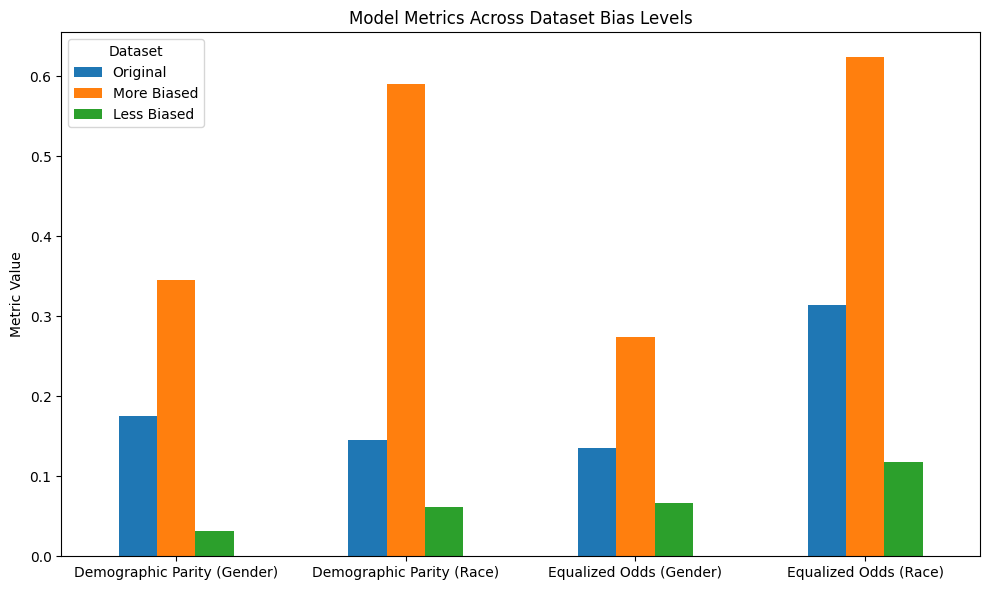

In [ ]:
# Transpose for easier plotting
plot_df = results_df.set_index('Dataset').T

# Plot
plot_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Metrics Across Dataset Bias Levels")
plt.ylabel("Metric Value")
plt.xticks(rotation=0)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

##**In-Process Bias Mitigation: Exponentiated Gradient with Demographic Parity**

Some info about exponentiated gradient reduction

In [ ]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

###Part 1: Less Biased Dataset with Gender

**Step 1.** Split the data, including sensitive_features and using Xlb, ylb from previous section

In [ ]:
##Uncomment to run again; already done in previous section
#Xlb = less_bias_df.drop(['income'], axis=1, inplace=False)
#ylb = less_bias_df['income']

In [ ]:
sensitive_features_Lg=Xlb[['gender_Male', 'gender_Female']]

In [ ]:
X_train_Lg, X_test_Lg, y_train_Lg, y_test_Lg, gender_train_Lg, gender_test_Lg = train_test_split(Xlb, ylb, sensitive_features_Lg, test_size=0.2)

**Step 2.** Wrap the model in the bias mitigator

In [ ]:
mitigator_Lg_DP = ExponentiatedGradient(
    model,
    constraints=DemographicParity()
)

**Step 3.** Train the model

In [ ]:
mitigator_Lg_DP.fit(X_train_Lg, y_train_Lg, sensitive_features=gender_train_Lg)

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x7da279b401d0>,
                      estimator=DecisionTreeClassifier(),
                      nu=np.float64(0.000364391845367273))

**Step 4.** Test the model

In [ ]:
pred_Lg_DP = mitigator_Lg_DP.predict(X_test_Lg)

###Part 2: Less Biased Dataset with Race

**Step 1.** Split the data, including sensitive_features and using Xlb, ylb from previous section

In [ ]:
sensitive_features_Lr=Xlb[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]

In [ ]:
X_train_Lr, X_test_Lr, y_train_Lr, y_test_Lr, race_train_Lr, race_test_Lr = train_test_split(Xlb, ylb, sensitive_features_Lr, test_size=0.2)

**Step 2.** Wrap the model in the bias mitigator

In [ ]:
mitigator_Lr_DP = ExponentiatedGradient(
    model,
    constraints=DemographicParity()
)

**Step 3.** Train the model

In [ ]:
mitigator_Lr_DP.fit(X_train_Lr, y_train_Lr, sensitive_features=race_train_Lr)

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x7da279ae7e50>,
                      estimator=DecisionTreeClassifier(),
                      nu=np.float64(0.0003664005571803449))

**Step 4.** Test the model

In [ ]:
pred_Lr_DP = mitigator_Lr_DP.predict(X_test_Lr)

###Part 3: Originally Biased Dataset with Gender

**Step 1.** Split the data, including sensitive_features and using Xlb, ylb from previous section

In [ ]:
##Uncomment to run again; already done in previous section
#X = unaltered_df.drop(['income'], axis=1, inplace=False)
#y = unaltered_df['income']

In [ ]:
sensitive_features_Og=X[['gender_Male', 'gender_Female']]

In [ ]:
X_train_Og, X_test_Og, y_train_Og, y_test_Og, gender_train_Og, gender_test_Og = train_test_split(X, y, sensitive_features_Og, test_size=0.2)

**Step 2.** Wrap the model in the bias mitigator

In [ ]:
mitigator_Og_DP = ExponentiatedGradient(
    model,
    constraints=DemographicParity()
)

**Step 3.** Train the model

In [ ]:
mitigator_Og_DP.fit(X_train_Og, y_train_Og, sensitive_features=gender_train_Og)

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x7da2799a6d90>,
                      estimator=DecisionTreeClassifier(),
                      nu=np.float64(0.0004952292174450166))

**Step 4.** Test the model

In [ ]:
pred_Og_DP = mitigator_Og_DP.predict(X_test_Og)

###Part 4: Originally Biased Dataset with Race

**Step 1.** Split the data, including sensitive_features and using Xlb, ylb from previous section

In [ ]:
sensitive_features_Or=X[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]

In [ ]:
X_train_Or, X_test_Or, y_train_Or, y_test_Or, race_train_Or, race_test_Or = train_test_split(X, y, sensitive_features_Or, test_size=0.2)

**Step 2.** Wrap the model in the bias mitigator

In [ ]:
mitigator_Or_DP = ExponentiatedGradient(
    model,
    constraints=DemographicParity()
)

**Step 3.** Train the model

In [ ]:
mitigator_Or_DP.fit(X_train_Or, y_train_Or, sensitive_features=race_train_Or)

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x7da2798527d0>,
                      estimator=DecisionTreeClassifier(),
                      nu=np.float64(0.0004954078309224321))

**Step 4.** Test the model

In [ ]:
pred_Or_DP = mitigator_Or_DP.predict(X_test_Or)

###Part 5: More Biased Dataset with Gender

**Step 1.** Split the data, including sensitive_features and using Xlb, ylb from previous section

In [ ]:
##Uncomment to run again; already done in previous section
#X = more_bias_df.drop(['income'], axis=1, inplace=False)
#y = more_bias_df['income']

In [ ]:
sensitive_features_Mg=Xmb[['gender_Male', 'gender_Female']]

In [ ]:
X_train_Mg, X_test_Mg, y_train_Mg, y_test_Mg, gender_train_Mg, gender_test_Mg = train_test_split(Xmb, ymb, sensitive_features_Mg, test_size=0.2)

**Step 2.** Wrap the model in the bias mitigator

In [ ]:
mitigator_Mg_DP = ExponentiatedGradient(
    model,
    constraints=DemographicParity()
)

**Step 3.** Train the model

In [ ]:
mitigator_Mg_DP.fit(X_train_Mg, y_train_Mg, sensitive_features=gender_train_Mg)

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x7da279167610>,
                      estimator=DecisionTreeClassifier(),
                      nu=np.float64(0.0005390293838883843))

**Step 4.** Test the model

In [ ]:
pred_Mg_DP = mitigator_Mg_DP.predict(X_test_Mg)

###Part 6: More Biased Dataset with Race

**Step 1.** Split the data, including sensitive_features and using Xlb, ylb from previous section

In [ ]:
sensitive_features_Mr=Xmb[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]

In [ ]:
X_train_Mr, X_test_Mr, y_train_Mr, y_test_Mr, race_train_Mr, race_test_Mr = train_test_split(Xmb, ymb, sensitive_features_Mr, test_size=0.2)

**Step 2.** Wrap the model in the bias mitigator

In [ ]:
mitigator_Mr_DP = ExponentiatedGradient(
    model,
    constraints=DemographicParity()
)

**Step 3.** Train the model

In [ ]:
mitigator_Mr_DP.fit(X_train_Mr, y_train_Mr, sensitive_features=race_train_Mr)

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x7da278e8cc90>,
                      estimator=DecisionTreeClassifier(),
                      nu=np.float64(0.0005369235522231446))

**Step 4.** Test the model

In [ ]:
pred_Mr_DP = mitigator_Mr_DP.predict(X_test_Mr)

##**In-Process Bias Mitigation: Exponentiated Gradient with Equalized Odds**

Some info about equalized odds or something idk

In [ ]:
from fairlearn.reductions import EqualizedOdds

###Part 1: Less Biased Dataset with Gender

**Step 1.** Split the data, including sensitive_features and using Xlb, ylb from previous section

In [ ]:
# #Uncomment to run again; already done in previous section
# sensitive_features_Lg=Xlb[['gender_Male', 'gender_Female']]
# X_train_Lg, X_test_Lg, y_train_Lg, y_test_Lg, gender_train_Lg, gender_test_Lg = train_test_split(Xlb, ylb, sensitive_features_Lg, test_size=0.2)

**Step 2.** Wrap the model in the bias mitigator

In [ ]:
mitigator_Lg_EO = ExponentiatedGradient(
    model,
    constraints=EqualizedOdds()
)

**Step 3.** Train the model

In [ ]:
mitigator_Lg_EO.fit(X_train_Lg, y_train_Lg, sensitive_features=gender_train_Lg)

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.EqualizedOdds object at 0x7da2799a4c90>,
                      estimator=DecisionTreeClassifier(),
                      nu=np.float64(0.000364391845367273))

**Step 4.** Test the model

In [ ]:
pred_Lg_EO = mitigator_Lg_EO.predict(X_test_Lg)

###Part 2: Less Biased Dataset with Race

**Step 1.** Split the data, including sensitive_features and using Xlb, ylb from previous section

In [ ]:
# #Uncomment to run again; already done in previous section
# sensitive_features_Lr=Xlb[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
# X_train_Lr, X_test_Lr, y_train_Lr, y_test_Lr, race_train_Lr, race_test_Lr = train_test_split(Xlb, ylb, sensitive_features_Lr, test_size=0.2)

**Step 2.** Wrap the model in the bias mitigator

In [ ]:
mitigator_Lr_EO = ExponentiatedGradient(
    model,
    constraints=EqualizedOdds()
)

**Step 3.** Train the model

In [ ]:
mitigator_Lr_EO.fit(X_train_Lr, y_train_Lr, sensitive_features=race_train_Lr)

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.EqualizedOdds object at 0x7da278341a10>,
                      estimator=DecisionTreeClassifier(),
                      nu=np.float64(0.0003664005571803449))

**Step 4.** Test the model

In [ ]:
pred_Lr_EO = mitigator_Lr_EO.predict(X_test_Lr)

###Part 3: Originally Biased Dataset with Gender

**Step 1.** Split the data, including sensitive_features and using Xlb, ylb from previous section

In [ ]:
# #Uncomment to run again; already done in previous section
# sensitive_features_Og=X[['gender_Male', 'gender_Female']]
# X_train_Og, X_test_Og, y_train_Og, y_test_Og, gender_train_Og, gender_test_Og = train_test_split(X, y, sensitive_features_Og, test_size=0.2)

**Step 2.** Wrap the model in the bias mitigator

In [ ]:
mitigator_Og_EO = ExponentiatedGradient(
    model,
    constraints=EqualizedOdds()
)

**Step 3.** Train the model

In [ ]:
mitigator_Og_EO.fit(X_train_Og, y_train_Og, sensitive_features=gender_train_Og)

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.EqualizedOdds object at 0x7da279a85c10>,
                      estimator=DecisionTreeClassifier(),
                      nu=np.float64(0.0004952292174450164))

**Step 4.** Test the model

In [ ]:
pred_Og_EO = mitigator_Og_EO.predict(X_test_Og)

###Part 4: Originally Biased Dataset with Race

**Step 1.** Split the data, including sensitive_features and using Xlb, ylb from previous section

In [ ]:
# #Uncomment to run again; already done in previous section
# sensitive_features_Or=X[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
# X_train_Or, X_test_Or, y_train_Or, y_test_Or, race_train_Or, race_test_Or = train_test_split(X, y, sensitive_features_Or, test_size=0.2)

**Step 2.** Wrap the model in the bias mitigator

In [ ]:
mitigator_Or_EO = ExponentiatedGradient(
    model,
    constraints=EqualizedOdds()
)

**Step 3.** Train the model

In [ ]:
mitigator_Or_EO.fit(X_train_Or, y_train_Or, sensitive_features=race_train_Or)

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.EqualizedOdds object at 0x7da275cc7ad0>,
                      estimator=DecisionTreeClassifier(),
                      nu=np.float64(0.0004954078309224355))

**Step 4.** Test the model

In [ ]:
pred_Or_EO = mitigator_Or_EO.predict(X_test_Or)

###Part 5: More Biased Dataset with Gender

**Step 1.** Split the data, including sensitive_features and using Xlb, ylb from previous section

In [ ]:
# #Uncomment to run again; already done in previous section
# sensitive_features_Mg=Xmb[['gender_Male', 'gender_Female']]
# X_train_Mg, X_test_Mg, y_train_Mg, y_test_Mg, gender_train_Mg, gender_test_Mg = train_test_split(Xmb, ymb, sensitive_features_Mg, test_size=0.2)

**Step 2.** Wrap the model in the bias mitigator

In [ ]:
mitigator_Mg_EO = ExponentiatedGradient(
    model,
    constraints=EqualizedOdds()
)

**Step 3.** Train the model

In [ ]:
mitigator_Mg_EO.fit(X_train_Mg, y_train_Mg, sensitive_features=gender_train_Mg)

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.EqualizedOdds object at 0x7da2761bdc10>,
                      estimator=DecisionTreeClassifier(),
                      nu=np.float64(0.0005390293838883894))

**Step 4.** Test the model

In [ ]:
pred_Mg_EO = mitigator_Mg_EO.predict(X_test_Mg)

###Part 6: More Biased Dataset with Race

**Step 1.** Split the data, including sensitive_features and using Xlb, ylb from previous section

In [ ]:
# #Uncomment to run again; already done in previous section
# sensitive_features_Mr=Xmb[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
# X_train_Mr, X_test_Mr, y_train_Mr, y_test_Mr, race_train_Mr, race_test_Mr = train_test_split(Xmb, ymb, sensitive_features_Mr, test_size=0.2)

**Step 2.** Wrap the model in the bias mitigator

In [ ]:
mitigator_Mr_EO = ExponentiatedGradient(
    model,
    constraints=EqualizedOdds()
)

**Step 3.** Train the model

In [ ]:
mitigator_Mr_EO.fit(X_train_Mr, y_train_Mr, sensitive_features=race_train_Mr)

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.EqualizedOdds object at 0x7da27615f790>,
                      estimator=DecisionTreeClassifier(),
                      nu=np.float64(0.0005369235522231446))

**Step 4.** Test the model

In [ ]:
pred_Mr_EO = mitigator_Mr_EO.predict(X_test_Mr)

##**Evaluating Mitigation Techniques: Exponentiated Gradient with Demographic Parity**

###**Part 1.** Less Biased Dataset: Accuracy

**Step 1.** Accuracy when mitigating for gender

In [ ]:
accuracy_Lg_DP = accuracy_score(y_test_Lg, pred_Lg_DP)
print(f"{accuracy_Lg_DP:.2%}")

92.70%


**Step 2.** Accuracy when mitigating for race

In [ ]:
accuracy_Lr_DP = accuracy_score(y_test_Lr, pred_Lr_DP)
print(f"{accuracy_Lr_DP:.2%}")

93.18%


###**Part 2.** Less Biased Dataset: Demographic Parity

**Step 1.** Demographic parity when mitigating for gender

In [ ]:
#Create MetricFrame
mf_Less_DP_g = MetricFrame(
    metrics={'selection rate' : selection_rate},
    y_true=y_test_Lg,
    y_pred=pred_Lg_DP,
    sensitive_features=X_test_Lg[['gender_Male', 'gender_Female']]
)

Here, the selection rate for gender_Male is 0.26, and the selection rate for gender_Female is 0.25. This is approximately equal to selection rates before the bias mitigation technique

In [ ]:
#likelihood of positive prediction by gender
display(mf_Less_DP_g.by_group)

selection rate
gender_Male gender_Female                
0.0         0.0                       NaN
            1.0                  0.255556
1.0         0.0                  0.243621
            1.0                       NaN

The overall selection rate is 0.26, which is very close to the overall selection rate before implementing bias mitigation.

In [ ]:
mf_Less_DP_g.overall

,0
selection rate,0.24754


Here, demographic parity difference for gender is 0.008, which is extremely low, almost zero. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize demographic parity for gender is applied to a dataset that already has a very low demographic parity for gender, the technique still works but is limited by how much closer to zero it is possible to get, so only a small change is seen.

In [ ]:
#demographic parity for gender
dp_g_lb_2_dpg = demographic_parity_difference(
    y_true=y_test_Lg,
    y_pred=pred_Lg_DP,
    sensitive_features=X_test_Lg[['gender_Male', 'gender_Female']]
)

print(dp_g_lb_2_dpg)

0.011934156378600791


Here, demographic parity difference for race is 0.095, which is very low, but actually higher than before. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize demographic parity for for one demographic is applied to a dataset that already has a very low demographic parity for another demographic, it may increase the demographic parity for the other demographic.

In [ ]:
#demographic parity for race
dp_r_lb_2_dpg = demographic_parity_difference(
    y_true=y_test_Lg,
    y_pred=pred_Lg_DP,
    sensitive_features=X_test_Lg[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

print(dp_r_lb_2_dpg)

0.0727272727272727


**Step 2.** Demographic parity when mitigating for race

In [ ]:
#Create MetricFrame
mf_Less_DP_r = MetricFrame(
    metrics={'selection rate' : selection_rate},
    y_true=y_test_Lr,
    y_pred=pred_Lr_DP,
    sensitive_features=X_test_Lr[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

Here, the selection rate for race_Asian-Pac-Islander is 0.28, for race_White is 0.24, for race_Amer-Indian-Eskimo is 0.32, for race_Black is 0.26, and for race_Other is 0.25. For each race, this represents either no change or a very small change from before applying bias mitigation (<=0.05).

In [ ]:
#likelihood of positive prediction by race
display(mf_Less_DP_r.by_group)

selection rate
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other                
0.0        0.0        0.0                     0.0                     0.0                    NaN
                                                                      1.0               0.317460
                                              1.0                     0.0               0.247191
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0               0.242902
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
           1.0        0.0                     0.0                     0.0               0.260223
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
1.0        0.0        0.0                     0.0                     0.0               0.247265
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
           1.0        0.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN

The overall selection rate is 0.24, which is very close to the overall selection rate before implementing bias mitigation.

In [ ]:
mf_Less_DP_r.overall

,0
selection rate,0.248756


Here, demographic parity difference is 0.08, which is very low but actually higher than the demographic parity for race in before applying bias mitigation.

In [ ]:
#demographic parity for race
dp_r_lb_2_dpr = demographic_parity_difference(
    y_true=y_test_Lr,
    y_pred=pred_Lr_DP,
    sensitive_features=X_test_Lr[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

print(dp_r_lb_2_dpr)

0.07455810925842471


Here, demographic parity difference is 0.04, which is approximately the same as the demographic parity for gender in before applying bias mitigation.

In [ ]:
#demographic parity for gender
dp_g_lb_2_dpr = demographic_parity_difference(
    y_true=y_test_Lr,
    y_pred=pred_Lr_DP,
    sensitive_features=X_test_Lr[['gender_Male', 'gender_Female']]
)

print(dp_g_lb_2_dpr)

0.0436836484474184


###**Part 3.** Less Biased Dataset: Equalized Odds

**Step 1.** Equalized odds when mitigating for gender

In [ ]:
mf_tpr_Less_DP_g = MetricFrame(
    metrics={'tpr': lambda y_t, y_p: recall_score(y_t, y_p)},
    y_true=y_test_Lg,
    y_pred=pred_Lg_DP,
    sensitive_features=X_test_Lg[['gender_Male', 'gender_Female']]
)

mf_fpr_Less_DP_g = MetricFrame(
    metrics={'fpr': lambda y_t, y_p: fpr(y_t, y_p)},
    y_true=y_test_Lg,
    y_pred=pred_Lg_DP,
    sensitive_features=X_test_Lg[['gender_Male', 'gender_Female']]
)

Here, the TPR for gender_Male is 0.83, which is slightly higher than before applying bias mitigation. For gender_Female, the tpr is 0.89, which is slightly lower than before applying bias mitigation.

In [ ]:
display(mf_tpr_Less_DP_g.by_group)

tpr
gender_Male gender_Female          
0.0         0.0                 NaN
            1.0            0.934722
1.0         0.0            0.817033
            1.0                 NaN

Here, the FPR for gender_Male is 0.07, which is slightly higher than before applying bias mitigation. For gender_Female, the fpr is 0.03, which is about the same as before applying bias mitigation.

In [ ]:
display(mf_fpr_Less_DP_g.by_group)

fpr
gender_Male gender_Female          
0.0         0.0                 NaN
            1.0            0.038222
1.0         0.0            0.055118
            1.0                 NaN

The TPR gap is 0.06, which is lower than the TPR gap for this dataset before bias mitigation.

In [ ]:
mf_tpr_Less_DP_g.difference('between_groups')

,0
tpr,0.11769


The FPR gap is 0.04, which is slightly higher than the FPR gap for this dataset before bias mitigation.

In [ ]:
mf_fpr_Less_DP_g.difference('between_groups')

,0
fpr,0.016896


Here, the result for equalized odds for gender is 0.06, which is lower than before implementing bias mitigation.

In [ ]:
#equalized odds for gender
eo_g_lb_2_dpg = equalized_odds_difference(
    y_true=y_test_Lg,
    y_pred=pred_Lg_DP,
    sensitive_features=X_test_Lg[['gender_Male', 'gender_Female']],
)

print(eo_g_lb_2_dpg)

0.117689620758483


Here, the result for equalized odds for race is 0.16, which is a bit higher than before implementing bias mitigation. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize equalized odds for for one demographic is applied to a dataset that already has low equalized odds for another demographic, it may increase the demographic parity for the other demographic.

In [ ]:
#equalized odds for race
eo_r_lb_2_dpg = equalized_odds_difference(
    y_true=y_test_Lg,
    y_pred=pred_Lg_DP,
    sensitive_features=X_test_Lg[['race_White', 'race_Asian-Pac-Islander', 'race_Black', 'race_Amer-Indian-Eskimo', 'race_Other']],
)

print(eo_r_lb_2_dpg)

0.15778474399164055


**Step 2.** Equalized odds when mitigating for race

In [ ]:
mf_tpr_Less_DP_r = MetricFrame(
    metrics={'tpr': lambda y_t, y_p: recall_score(y_t, y_p)},
    y_true=y_test_Lr,
    y_pred=pred_Lr_DP,
    sensitive_features=X_test_Lr[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

mf_fpr_Less_DP_r = MetricFrame(
    metrics={'fpr': lambda y_t, y_p: fpr(y_t, y_p)},
    y_true=y_test_Lr,
    y_pred=pred_Lr_DP,
    sensitive_features=X_test_Lr[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

Here, the TPR for race_White is 0.82, for race_Asian-Pac-Islander is 0.91, for race_Black is 0.89, for race_Amer-Indian-Eskimo is 0.90, and for race_Other is 0.90. For race_Black, this represents a small decrease, for race_Amer-Indian-Eskimo, this represents a small increase, and for each other group, it represents no or almost no change.

In [ ]:
display(mf_tpr_Less_DP_r.by_group)

tpr
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other          
0.0        0.0        0.0                     0.0                     0.0              NaN
                                                                      1.0         1.000000
                                              1.0                     0.0         1.000000
                                                                      1.0              NaN
                      1.0                     0.0                     0.0         0.890411
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0         0.915423
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
1.0        0.0        0.0                     0.0                     0.0         0.851928
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN

Here, the FPR for race_White is 0.05, for race_Asian-Pac-Islander is 0.03, for race_Black is 0.04, for race_Amer-Indian-Eskimo is 0.09, and for race_Other is 0.03. For race_Other, this represents a small decrease, and for each other group, it represents no or almost no change.

In [ ]:
display(mf_fpr_Less_DP_r.by_group)

fpr
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other          
0.0        0.0        0.0                     0.0                     0.0              NaN
                                                                      1.0         0.000000
                                              1.0                     0.0         0.028986
                                                                      1.0              NaN
                      1.0                     0.0                     0.0         0.049180
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0         0.042904
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
1.0        0.0        0.0                     0.0                     0.0         0.045330
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN

Here, the result for equalized odds for race is 0.09, which is lower than before implementing bias mitigation.

In [ ]:
eo_r_lb_2_dpr = equalized_odds_difference(
    y_true=y_test_Lr,
    y_pred=pred_Lr_DP,
    sensitive_features=X_test_Lr[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']],
)

print(eo_r_lb_2_dpr)

0.14807197943444728


Here, the result for equalized odds for gender is 0.13, which is about the same as before implementing bias mitigation.

In [ ]:
eo_g_lb_2_dpr = equalized_odds_difference(
    y_true=y_test_Lr,
    y_pred=pred_Lr_DP,
    sensitive_features=X_test_Lr[['gender_Male', 'gender_Female']],
)

print(eo_g_lb_2_dpr)

0.11533816216738502


###**Part 4.** Originally Biased Dataset: Accuracy

**Step 1.** Accuracy when mitigating for gender

In [ ]:
accuracy_Og_DP = accuracy_score(y_test_Og, pred_Og_DP)
print(f"{accuracy_Og_DP:.2%}")

74.81%


**Step 2.** Accuracy when mitigating for race

In [ ]:
accuracy_Or_DP = accuracy_score(y_test_Or, pred_Or_DP)
print(f"{accuracy_Or_DP:.2%}")

76.64%


###**Part 5.** Originally Biased Dataset: Demographic Parity

**Step 1.** Demographic parity when mitigating for gender

In [ ]:
#Create MetricFrame
mf_Original_DP_g = MetricFrame(
    metrics={'selection rate' : selection_rate},
    y_true=y_test_Og,
    y_pred=pred_Og_DP,
    sensitive_features=X_test_Og[['gender_Male', 'gender_Female']]
)

Here, the selection rate for gender_Male is 0.27, which is slightly lower than before applying bias mitigation. The selection rate for gender_Female is 0.22, higher than before applying bias mitigation. Now the two values are much closer to each other.

In [ ]:
#likelihood of positive prediction by gender
display(mf_Original_DP_g.by_group)

selection rate
gender_Male gender_Female                
0.0         0.0                       NaN
            1.0                  0.248954
1.0         0.0                  0.279909
            1.0                       NaN

The overall selection rate is 0.25, which is very close to the overall selection rate before implementing bias mitigation.

In [ ]:
mf_Original_DP_g.overall

,0
selection rate,0.270094


Here, demographic parity difference for gender is 0.05, which is very low, and significantly lower than before applying bias mitigation. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize demographic parity for gender is applied to a dataset that already has a low demographic parity for gender, the technique works but possibly lowers demographic parity to a higher number than when applied to a dataset with a *very* low demographic parity already (more experimentation is required to come to a definitive conclusion).

In [ ]:
#demographic parity for gender
dp_g_ob_2_dpg = demographic_parity_difference(
    y_true=y_test_Og,
    y_pred=pred_Og_DP,
    sensitive_features=X_test_Og[['gender_Male', 'gender_Female']]
)

print(dp_g_ob_2_dpg)

0.03095536620869832


Here, demographic parity difference for race is 0.099, which is very low, and lower than before applying bias mitigation. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize demographic parity for for one demographic is applied to a dataset that already has a low (but not very low) demographic parity for another demographic, it may result in both demographic parities decreasing.

In [ ]:
#demographic parity for race
dp_r_ob_2_dpg = demographic_parity_difference(
    y_true=y_test_Og,
    y_pred=pred_Og_DP,
    sensitive_features=X_test_Og[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

print(dp_r_ob_2_dpg)

0.1584910358565737


**Step 2.** Demographic parity when mitigating for race

In [ ]:
#Create MetricFrame
mf_Original_DP_r = MetricFrame(
    metrics={'selection rate' : selection_rate},
    y_true=y_test_Or,
    y_pred=pred_Or_DP,
    sensitive_features=X_test_Or[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

Here, the selection rate for race_Asian-Pac-Islander is 0.28, for race_White is 0.25, for race_Amer-Indian-Eskimo is 0.23, for race_Black is 0.24, and for race_Other is 0.23. For Asian-Pac-Islander and White, this represents a very small change from before applying bias mitigation. For Amer-Indian-Eskimo, Black, and Other, this represents a increase to almost the values of the other race categories.

In [ ]:
#likelihood of positive prediction by race
display(mf_Original_DP_r.by_group)

selection rate
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other                
0.0        0.0        0.0                     0.0                     0.0                    NaN
                                                                      1.0               0.272727
                                              1.0                     0.0               0.207317
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0               0.271318
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
           1.0        0.0                     0.0                     0.0               0.222089
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
1.0        0.0        0.0                     0.0                     0.0               0.240072
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
           1.0        0.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN

The overall selection rate is 0.25, which is very close to the overall selection rate before implementing bias mitigation.

In [ ]:
mf_Original_DP_r.overall

,0
selection rate,0.239248


Here, demographic parity difference is 0.08, which is low, and lower than the demographic parity for race in before applying bias mitigation.

In [ ]:
#demographic parity for race
dp_r_ob_2_dpr = demographic_parity_difference(
    y_true=y_test_Or,
    y_pred=pred_Or_DP,
    sensitive_features=X_test_Or[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

print(dp_r_ob_2_dpr)

0.06541019955654101


Here, demographic parity difference for gender is 0.19, which is approximately the same as the demographic parity for gender in before applying bias mitigation.

In [ ]:
#demographic parity for gender
dp_g_ob_2_dpr = demographic_parity_difference(
    y_true=y_test_Or,
    y_pred=pred_Or_DP,
    sensitive_features=X_test_Or[['gender_Male', 'gender_Female']]
)

print(dp_g_ob_2_dpr)

0.15975240607423102


###**Part 6.** Originally Biased Dataset: Equalized Odds

**Step 1.** Equalized odds when mitigating for gender

In [ ]:
mf_tpr_Original_DP_g = MetricFrame(
    metrics={'tpr': lambda y_t, y_p: recall_score(y_t, y_p)},
    y_true=y_test_Og,
    y_pred=pred_Og_DP,
    sensitive_features=X_test_Og[['gender_Male', 'gender_Female']]
)

mf_fpr_Original_DP_g = MetricFrame(
    metrics={'fpr': lambda y_t, y_p: fpr(y_t, y_p)},
    y_true=y_test_Og,
    y_pred=pred_Og_DP,
    sensitive_features=X_test_Og[['gender_Male', 'gender_Female']]
)

Here, the TPR for gender_Male is 0.53, and for gender_Female is 0.46. These are both about the same as before applying bias mitigation.

In [ ]:
display(mf_tpr_Original_DP_g.by_group)

tpr
gender_Male gender_Female          
0.0         0.0                 NaN
            1.0            0.540625
1.0         0.0            0.535954
            1.0                 NaN

Here, the FPR for gender_Male is 0.16, which is slightly lower than before applying bias mitigation. For gender_Female, the fpr is 0.07, which is about the same as or slightly higher than before applying bias mitigation.

In [ ]:
display(mf_fpr_Original_DP_g.by_group)

fpr
gender_Male gender_Female          
0.0         0.0                 NaN
            1.0            0.212323
1.0         0.0            0.163289
            1.0                 NaN

The TPR gap is 0.07, which is lower than the TPR gap for this dataset before bias mitigation.

In [ ]:
mf_tpr_Original_DP_g.difference('between_groups')

,0
tpr,0.004671


The FPR gap is 0.09, which is about the same as the FPR gap for this dataset before bias mitigation.

In [ ]:
mf_fpr_Original_DP_g.difference('between_groups')

,0
fpr,0.049034


Here, the result for equalized odds for gender is 0.09, which is lower than before implementing bias mitigation.

In [ ]:
#equalized odds for gender
eo_g_ob_2_dpg = equalized_odds_difference(
    y_true=y_test_Og,
    y_pred=pred_Og_DP,
    sensitive_features=X_test_Og[['gender_Male', 'gender_Female']],
)

print(eo_g_ob_2_dpg)

0.049034041224696956


Here, the result for equalized odds for race is 0.28, which is outside the fairness range, but still significantly lower than before implementing bias mitigation. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize equalized odds for for one demographic is applied to a dataset that has high equalized odds for another demographic, it may decrease the demographic parity for that other demographic.

In [ ]:
#equalized odds for race
eo_r_ob_2_dpg = equalized_odds_difference(
    y_true=y_test_Og,
    y_pred=pred_Og_DP,
    sensitive_features=X_test_Og[['race_White', 'race_Asian-Pac-Islander', 'race_Black', 'race_Amer-Indian-Eskimo', 'race_Other']],
)

print(eo_r_ob_2_dpg)

0.23076923076923073


**Step 2.** Equalized odds when mitigating for race

In [ ]:
mf_tpr_Original_DP_r = MetricFrame(
    metrics={'tpr': lambda y_t, y_p: recall_score(y_t, y_p)},
    y_true=y_test_Or,
    y_pred=pred_Or_DP,
    sensitive_features=X_test_Or[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

mf_fpr_Original_DP_r = MetricFrame(
    metrics={'fpr': lambda y_t, y_p: fpr(y_t, y_p)},
    y_true=y_test_Or,
    y_pred=pred_Or_DP,
    sensitive_features=X_test_Or[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

Here, the TPR for race_White is 0.55, for race_Asian-Pac-Islander is 0.52, for race_Black is 0.53, for race_Amer-Indian-Eskimo is 0.45, and for race_Other is 0.71. For race_Black and race_Other, this represents an increase, for race_Amer-Indian-Eskimo, this represents a small decrease, and for each other group, it represents no or almost no change.

In [ ]:
display(mf_tpr_Original_DP_r.by_group)

tpr
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other          
0.0        0.0        0.0                     0.0                     0.0              NaN
                                                                      1.0         0.571429
                                              1.0                     0.0         0.625000
                                                                      1.0              NaN
                      1.0                     0.0                     0.0         0.469697
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0         0.577982
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
1.0        0.0        0.0                     0.0                     0.0         0.508651
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN

Here, the FPR for race_White is 0.15, for race_Asian-Pac-Islander is 0.15, for race_Black is 0.08, for race_Amer-Indian-Eskimo is 0.08, and for race_Other is 0.10. For race_Asian-Pas_Islander, race_Amer-Indian-Eskimo, and race_Other, this represents a decrease, and for the other two groups, it represents no or almost no change.

In [ ]:
display(mf_fpr_Original_DP_r.by_group)

fpr
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other          
0.0        0.0        0.0                     0.0                     0.0              NaN
                                                                      1.0         0.237288
                                              1.0                     0.0         0.162162
                                                                      1.0              NaN
                      1.0                     0.0                     0.0         0.203125
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0         0.168508
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
1.0        0.0        0.0                     0.0                     0.0         0.146118
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN

The TPR gap is 0.26, which is just outside the fairness range, but still significantly lower than the TPR gap for this dataset before bias mitigation.

In [ ]:
mf_tpr_Original_DP_r.difference('between_groups')

,0
tpr,0.155303


The FPR gap is 0.07, which is slightly lower than the FPR gap for this dataset before bias mitigation.

In [ ]:
mf_fpr_Original_DP_r.difference('between_groups')

,0
fpr,0.09117


Here, the result for equalized odds for race is 0.26, which is just outside the fairness range, but still significantly lower than before bias mitigation.

In [ ]:
#equalized odds for race
eo_r_ob_2_dpr = equalized_odds_difference(
    y_true=y_test_Or,
    y_pred=pred_Or_DP,
    sensitive_features=X_test_Or[['race_White', 'race_Asian-Pac-Islander', 'race_Black', 'race_Amer-Indian-Eskimo', 'race_Other']],
)

print(eo_r_ob_2_dpr)

0.15530303030303028


Here, the result for equalized odds for gender is 0.14, which is slightly lower than before implementing bias mitigation. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize equalized odds for for one demographic is applied to a dataset that has low equalized odds for another demographic, it may slighty decrease the exponentiated gradient for that other demographic.

In [ ]:
#equalized odds for gender
eo_g_ob_2_dpr = equalized_odds_difference(
    y_true=y_test_Or,
    y_pred=pred_Or_DP,
    sensitive_features=X_test_Or[['gender_Male', 'gender_Female']],
)

print(eo_g_ob_2_dpr)

0.09553840490599083


###**Part 7.** More Biased Dataset: Accuracy

**Step 1.** Accuracy when mitigating for gender

In [ ]:
accuracy_Mg_DP = accuracy_score(y_test_Mg, pred_Mg_DP)
print(f"{accuracy_Mg_DP:.2%}")

63.60%


**Step 2.** Accuracy when mitigating for race

In [ ]:
accuracy_Mr_DP = accuracy_score(y_test_Mr, pred_Mr_DP)
print(f"{accuracy_Mr_DP:.2%}")

62.33%


###**Part 8.** More Biased Dataset: Demographic Parity

**Step 1.** Demographic parity when mitigating for gender

In [ ]:
#Create MetricFrame
mf_More_DP_g = MetricFrame(
    metrics={'selection rate' : selection_rate},
    y_true=y_test_Mg,
    y_pred=pred_Mg_DP,
    sensitive_features=X_test_Mg[['gender_Male', 'gender_Female']]
)

Here, the selection rate for gender_Male is 0.75, which is approximately equal to before applying bias mitigation. The selection rate for gender_Female is 0.70, which is significantly higher than before applying bias mitigation.

In [ ]:
#likelihood of positive prediction by gender
display(mf_More_DP_g.by_group)

selection rate
gender_Male gender_Female                
0.0         0.0                       NaN
            1.0                  0.731666
1.0         0.0                  0.755012
            1.0                       NaN

The overall selection rate is 0.74, which is higher than the overall selection rate before implementing bias mitigation.

In [ ]:
mf_More_DP_g.overall

,0
selection rate,0.747374


Here, demographic parity difference for gender is 0.05, which is low, and significantly lower than before applying bias mitigation. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize demographic parity for gender is applied to a dataset that has a high demographic parity for gender, it seemingly brings down demographic parity just as low as when applied to a dataset with a low demographic parity (more experimentation is required to come to a definitive conclusion).

In [ ]:
#demographic parity for gender
dp_g_mb_2_dpg = demographic_parity_difference(
    y_true=y_test_Mg,
    y_pred=pred_Mg_DP,
    sensitive_features=X_test_Mg[['gender_Male', 'gender_Female']]
)

print(dp_g_mb_2_dpg)

0.02334539839411165


Here, demographic parity difference for race is 0.51, which is quite high, and only a bit lower than before applying bias mitigation. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize demographic parity for for one demographic is applied to a dataset that has a high demographic parity for another demographic, it may result in no or a small decrease for the demographic with a high demographic parity.

In [ ]:
#demographic parity for race
dp_r_mb_2_dpg = demographic_parity_difference(
    y_true=y_test_Mg,
    y_pred=pred_Mg_DP,
    sensitive_features=X_test_Mg[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

print(dp_r_mb_2_dpg)

0.38329147346728487


**Step 2.** Demographic parity when mitigating for race

In [ ]:
#Create MetricFrame
mf_More_DP_r = MetricFrame(
    metrics={'selection rate' : selection_rate},
    y_true=y_test_Mr,
    y_pred=pred_Mr_DP,
    sensitive_features=X_test_Mr[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

Here, the selection rate for race_Asian-Pac-Islander is 0.69, for race_White is 0.72, for race_Amer-Indian-Eskimo is 0.73, for race_Black is 0.72, and for race_Other is 0.66. For Asian-Pac-Islander and White, this represents a very small change from before applying bias mitigation. For Amer-Indian-Eskimo, Black, and Other, this represents a very significant increase to about the values of the other race categories.

In [ ]:
#likelihood of positive prediction by race
display(mf_More_DP_r.by_group)

selection rate
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other                
0.0        0.0        0.0                     0.0                     0.0                    NaN
                                                                      1.0               0.647887
                                              1.0                     0.0               0.760000
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0               0.727626
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
           1.0        0.0                     0.0                     0.0               0.717799
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
1.0        0.0        0.0                     0.0                     0.0               0.719696
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
           1.0        0.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN

The overall selection rate is 0.71, which is a bit higher than the overall selection rate before implementing bias mitigation.

In [ ]:
mf_More_DP_r.overall

,0
selection rate,0.719624


Here, demographic parity difference is 0.07, which is low, and significantly lower than the demographic parity for race in before applying bias mitigation.

In [ ]:
#demographic parity for race
dp_r_mb_2_dpr = demographic_parity_difference(
    y_true=y_test_Mr,
    y_pred=pred_Mr_DP,
    sensitive_features=X_test_Mr[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

print(dp_r_mb_2_dpr)

0.11211267605633801


Here, demographic parity difference for gender is 0.27, which is approximately the same as the demographic parity for gender in before applying bias mitigation.

In [ ]:
#demographic parity for gender
dp_g_mb_2_dpr = demographic_parity_difference(
    y_true=y_test_Mr,
    y_pred=pred_Mr_DP,
    sensitive_features=X_test_Mr[['gender_Male', 'gender_Female']]
)

print(dp_g_mb_2_dpr)

0.2699560413846128


###**Part 9.** More Biased Dataset: Equalized Odds

**Step 1.** Equalized odds when mitigating for gender

In [ ]:
mf_tpr_More_DP_g = MetricFrame(
    metrics={'tpr': lambda y_t, y_p: recall_score(y_t, y_p)},
    y_true=y_test_Mg,
    y_pred=pred_Mg_DP,
    sensitive_features=X_test_Mg[['gender_Male', 'gender_Female']]
)

mf_fpr_More_DP_g = MetricFrame(
    metrics={'fpr': lambda y_t, y_p: fpr(y_t, y_p)},
    y_true=y_test_Mg,
    y_pred=pred_Mg_DP,
    sensitive_features=X_test_Mg[['gender_Male', 'gender_Female']]
)

Here, the TPR for gender_Male is 0.80, which is about the same as before applying bias mitigation. The tpr gender_Female is 0.56, which is slightly higher than before applying bias mitigation.

In [ ]:
display(mf_tpr_More_DP_g.by_group)

tpr
gender_Male gender_Female          
0.0         0.0                 NaN
            1.0            0.766341
1.0         0.0            0.788659
            1.0                 NaN

Here, the FPR for gender_Male is 0.65, which is about the same as before applying bias mitigation. For gender_Female, the fpr is 0.41, which is higher than before applying bias mitigation.

In [ ]:
display(mf_fpr_More_DP_g.by_group)

fpr
gender_Male gender_Female          
0.0         0.0                 NaN
            1.0            0.703317
1.0         0.0            0.631982
            1.0                 NaN

The TPR gap is 0.24, which is lower than the TPR gap for this dataset before bias mitigation.

In [ ]:
mf_tpr_More_DP_g.difference('between_groups')

,0
tpr,0.022318


The FPR gap is 0.24, which is slightly lower than the FPR gap for this dataset before bias mitigation.

In [ ]:
mf_fpr_More_DP_g.difference('between_groups')

,0
fpr,0.071335


Here, the result for equalized odds for gender is 0.24, which is sliglt lower than before implementing bias mitigation.

In [ ]:
#equalized odds for gender
eo_g_mb_2_dpg = equalized_odds_difference(
    y_true=y_test_Mg,
    y_pred=pred_Mg_DP,
    sensitive_features=X_test_Mg[['gender_Male', 'gender_Female']],
)

print(eo_g_mb_2_dpg)

0.07133531597953935


Here, the result for equalized odds for race is 0.53, which is high, but still significantly lower than before implementing bias mitigation. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize equalized odds for for one demographic is applied to a dataset that has high equalized odds for another demographic, it may decrease the demographic parity for that other demographic.

In [ ]:
#equalized odds for race
eo_r_mb_2_dpg = equalized_odds_difference(
    y_true=y_test_Mg,
    y_pred=pred_Mg_DP,
    sensitive_features=X_test_Mg[['race_White', 'race_Asian-Pac-Islander', 'race_Black', 'race_Amer-Indian-Eskimo', 'race_Other']],
)

print(eo_r_mb_2_dpg)

0.48572577839624287


**Step 2.** Equalized odds when mitigating for race

In [ ]:
mf_tpr_More_DP_r = MetricFrame(
    metrics={'tpr': lambda y_t, y_p: recall_score(y_t, y_p)},
    y_true=y_test_Mr,
    y_pred=pred_Mr_DP,
    sensitive_features=X_test_Mr[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

mf_fpr_More_DP_r = MetricFrame(
    metrics={'fpr': lambda y_t, y_p: fpr(y_t, y_p)},
    y_true=y_test_Mr,
    y_pred=pred_Mr_DP,
    sensitive_features=X_test_Mr[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

Here, the TPR for race_White is 0.76, for race_Asian-Pac-Islander is 0.67, for race_Black is 0.38, for race_Amer-Indian-Eskimo is 0.31, and for race_Other is 0.53. For race_Black and race_Other, this represents an increase, for race_Asian-Pac-Islander, this represents a small decrease, and for each other group, it represents no or almost no change.

In [ ]:
display(mf_tpr_More_DP_r.by_group)

tpr
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other          
0.0        0.0        0.0                     0.0                     0.0              NaN
                                                                      1.0         0.615385
                                              1.0                     0.0         0.863636
                                                                      1.0              NaN
                      1.0                     0.0                     0.0         0.757895
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0         0.830769
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
1.0        0.0        0.0                     0.0                     0.0         0.748841
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN

Here, the FPR for race_White is 0.62, for race_Asian-Pac-Islander is 0.61, for race_Black is 0.16, for race_Amer-Indian-Eskimo is 0.22, and for race_Other is 0.19. For race_Asian-Pas_Islander, this represents a decrease, for Amer-Indian-Eskimo, this represents an increase, and for the other two groups, it represents no or almost no change.

In [ ]:
display(mf_fpr_More_DP_r.by_group)

fpr
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other          
0.0        0.0        0.0                     0.0                     0.0              NaN
                                                                      1.0         0.655172
                                              1.0                     0.0         0.730769
                                                                      1.0              NaN
                      1.0                     0.0                     0.0         0.641791
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0         0.697514
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
1.0        0.0        0.0                     0.0                     0.0         0.632095
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN

The TPR gap is 0.45, which is high, but still significantly lower than the TPR gap for this dataset before bias mitigation.

In [ ]:
mf_tpr_More_DP_r.difference('between_groups')

,0
tpr,0.248252


The FPR gap is 0.46, which is high, but lower than the FPR gap for this dataset before bias mitigation.

In [ ]:
mf_fpr_More_DP_r.difference('between_groups')

,0
fpr,0.098674


Here, the result for equalized odds for race is 0.46, which is high, but still lower than before bias mitigation.

In [ ]:
#equalized odds for race
eo_r_mb_2_dpr = equalized_odds_difference(
    y_true=y_test_Mr,
    y_pred=pred_Mr_DP,
    sensitive_features=X_test_Mr[['race_White', 'race_Asian-Pac-Islander', 'race_Black', 'race_Amer-Indian-Eskimo', 'race_Other']],
)

print(eo_r_mb_2_dpr)

0.24825174825174823


Here, the result for equalized odds for gender is 0.32, which is slightly higher than before implementing bias mitigation. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize equalized odds for for one demographic is applied to a dataset that has high equalized odds for another demographic, it may not affect the equalized odds for that other demographic.

In [ ]:
#equalized odds for gender
eo_g_mb_2_dpr = equalized_odds_difference(
    y_true=y_test_Mr,
    y_pred=pred_Mr_DP,
    sensitive_features=X_test_Mr[['gender_Male', 'gender_Female']],
)

print(eo_g_mb_2_dpr)

0.29354006894299967


##**Evaluating Mitigation Techniques: Exponentiated Gradient with Equalized Odds**

###**Part 1.** Less Biased Dataset: Accuracy

**Step 1.** Accuracy when mitigating for gender

In [ ]:
accuracy_Lg_EO = accuracy_score(y_test_Lg, pred_Lg_EO)
print(f"{accuracy_Lg_EO:.2%}")

92.79%


**Step 2.** Accuracy when mitigating for race

In [ ]:
accuracy_Lr_EO = accuracy_score(y_test_Lr, pred_Lr_EO)
print(f"{accuracy_Lr_EO:.2%}")

93.01%


###**Part 2.** Less Biased Dataset: Demographic Parity

**Step 1.** Demographic parity when mitigating for gender

In [ ]:
#Create MetricFrame
mf_Less_EO_g = MetricFrame(
    metrics={'selection rate' : selection_rate},
    y_true=y_test_Lg,
    y_pred=pred_Lg_EO,
    sensitive_features=X_test_Lg[['gender_Male', 'gender_Female']]
)

Here, the selection rate for gender_Male is 0.25, and the selection rate for gender_Female is also 0.25. These are both approximately equal to selection rates before the bias mitigation technique, but also closer together.

In [ ]:
#likelihood of positive prediction by gender
display(mf_Less_EO_g.by_group)

selection rate
gender_Male gender_Female                
0.0         0.0                       NaN
            1.0                  0.243098
1.0         0.0                  0.241481
            1.0                       NaN

The overall selection rate is 0.25, which is very close to the overall selection rate before implementing bias mitigation.

In [ ]:
mf_Less_EO_g.overall

,0
selection rate,0.242012


Here, demographic parity difference for gender is 0.004, which is extremely low, almost zero. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize equalized odds for gender is applied to a dataset that has a very low demographic parity for gender, the technique still works but is limited by how much closer to zero it is possible to get, so only a small change is seen.

In [ ]:
#demographic parity for gender
dp_g_lb_2_eog = demographic_parity_difference(
    y_true=y_test_Lg,
    y_pred=pred_Lg_EO,
    sensitive_features=X_test_Lg[['gender_Male', 'gender_Female']]
)

print(dp_g_lb_2_eog)

0.0016161616161615988


Here, demographic parity difference for race is 0.095, which is very low, but actually higher than before. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize equalized odds for for one demographic is applied to a dataset that has a very low demographic parity for another demographic, it may increase the demographic parity for the other demographic.

In [ ]:
#demographic parity for race
dp_r_lb_2_eog = demographic_parity_difference(
    y_true=y_test_Lg,
    y_pred=pred_Lg_EO,
    sensitive_features=X_test_Lg[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

print(dp_r_lb_2_eog)

0.04651826854435723


**Step 2.** Demographic parity when mitigating for race

In [ ]:
#Create MetricFrame
mf_Less_EO_r = MetricFrame(
    metrics={'selection rate' : selection_rate},
    y_true=y_test_Lr,
    y_pred=pred_Lr_EO,
    sensitive_features=X_test_Lr[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

Here, the selection rate for race_Asian-Pac-Islander is 0.26, for race_White is 0.24, for race_Amer-Indian-Eskimo is 0.30, for race_Black is 0.25, and for race_Other is 0.24. For each race, this represents either no change or a very small change from before applying bias mitigation.

In [ ]:
#likelihood of positive prediction by race
display(mf_Less_EO_r.by_group)

selection rate
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other                
0.0        0.0        0.0                     0.0                     0.0                    NaN
                                                                      1.0               0.301587
                                              1.0                     0.0               0.224719
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0               0.227129
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
           1.0        0.0                     0.0                     0.0               0.247831
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
1.0        0.0        0.0                     0.0                     0.0               0.254344
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
           1.0        0.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN

The overall selection rate is 0.25, which is very close to the overall selection rate before implementing bias mitigation.

In [ ]:
mf_Less_EO_r.overall

,0
selection rate,0.252847


Here, demographic parity difference is 0.07, which is very low but actually higher than the demographic parity for race in before applying bias mitigation.

In [ ]:
#demographic parity for race
dp_r_lb_2_eor = demographic_parity_difference(
    y_true=y_test_Lr,
    y_pred=pred_Lr_EO,
    sensitive_features=X_test_Lr[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

print(dp_r_lb_2_eor)

0.07686820046370607


Here, demographic parity difference is 0.03, which is approximately the same as the demographic parity for gender in before applying bias mitigation.

In [ ]:
#demographic parity for gender
dp_g_lb_2_eor = demographic_parity_difference(
    y_true=y_test_Lr,
    y_pred=pred_Lr_EO,
    sensitive_features=X_test_Lr[['gender_Male', 'gender_Female']]
)

print(dp_g_lb_2_eor)

0.04159682049790325


###**Part 3.** Less Biased Dataset: Equalized Odds

**Step 1.** Equalized odds when mitigating for gender

In [ ]:
mf_tpr_Less_EO_g = MetricFrame(
    metrics={'tpr': lambda y_t, y_p: recall_score(y_t, y_p)},
    y_true=y_test_Lg,
    y_pred=pred_Lg_EO,
    sensitive_features=X_test_Lg[['gender_Male', 'gender_Female']]
)

mf_fpr_Less_EO_g = MetricFrame(
    metrics={'fpr': lambda y_t, y_p: fpr(y_t, y_p)},
    y_true=y_test_Lg,
    y_pred=pred_Lg_EO,
    sensitive_features=X_test_Lg[['gender_Male', 'gender_Female']]
)

Here, the TPR for gender_Male is 0.83, which is slightly higher than before applying bias mitigation. For gender_Female, the tpr is 0.89, which is slightly lower than before applying bias mitigation.

In [ ]:
display(mf_tpr_Less_DP_g.by_group)

tpr
gender_Male gender_Female          
0.0         0.0                 NaN
            1.0            0.934722
1.0         0.0            0.817033
            1.0                 NaN

Here, the FPR for gender_Male is 0.07, which is slightly higher than before applying bias mitigation. For gender_Female, the fpr is 0.03, which is about the same as before applying bias mitigation.

In [ ]:
display(mf_fpr_Less_DP_g.by_group)

fpr
gender_Male gender_Female          
0.0         0.0                 NaN
            1.0            0.038222
1.0         0.0            0.055118
            1.0                 NaN

The TPR gap is 0.06, which is lower than the TPR gap for this dataset before bias mitigation.

In [ ]:
mf_tpr_Less_DP_g.difference('between_groups')

,0
tpr,0.11769


The FPR gap is 0.04, which is slightly higher than the FPR gap for this dataset before bias mitigation.

In [ ]:
mf_fpr_Less_DP_g.difference('between_groups')

,0
fpr,0.016896


Here, the result for equalized odds for gender is 0.06, which is lower than before implementing bias mitigation.

In [ ]:
#equalized odds for gender
eo_g_lb_2_eog = equalized_odds_difference(
    y_true=y_test_Lg,
    y_pred=pred_Lg_EO,
    sensitive_features=X_test_Lg[['gender_Male', 'gender_Female']],
)

print(eo_g_lb_2_eog)

0.09057717897538253


Here, the result for equalized odds for race is 0.16, which is a bit higher than before implementing bias mitigation. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize equalized odds for for one demographic is applied to a dataset that already has low equalized odds for another demographic, it may increase the demographic parity for the other demographic.

In [ ]:
#equalized odds for race
eo_r_lb_2_eog = equalized_odds_difference(
    y_true=y_test_Lg,
    y_pred=pred_Lg_EO,
    sensitive_features=X_test_Lg[['race_White', 'race_Asian-Pac-Islander', 'race_Black', 'race_Amer-Indian-Eskimo', 'race_Other']],
)

print(eo_r_lb_2_eog)

0.16614420062695923


**Step 2.** Equalized odds when mitigating for race

In [ ]:
mf_tpr_Less_DP_r = MetricFrame(
    metrics={'tpr': lambda y_t, y_p: recall_score(y_t, y_p)},
    y_true=y_test_Lr,
    y_pred=pred_Lr_EO,
    sensitive_features=X_test_Lr[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

mf_fpr_Less_DP_r = MetricFrame(
    metrics={'fpr': lambda y_t, y_p: fpr(y_t, y_p)},
    y_true=y_test_Lr,
    y_pred=pred_Lr_EO,
    sensitive_features=X_test_Lr[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

Here, the TPR for race_White is 0.82, for race_Asian-Pac-Islander is 0.91, for race_Black is 0.89, for race_Amer-Indian-Eskimo is 0.90, and for race_Other is 0.90. For race_Black, this represents a small decrease, for race_Amer-Indian-Eskimo, this represents a small increase, and for each other group, it represents no or almost no change.

In [ ]:
display(mf_tpr_Less_DP_r.by_group)

tpr
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other          
0.0        0.0        0.0                     0.0                     0.0              NaN
                                                                      1.0         0.900000
                                              1.0                     0.0         0.950000
                                                                      1.0              NaN
                      1.0                     0.0                     0.0         0.863014
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0         0.895522
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
1.0        0.0        0.0                     0.0                     0.0         0.862211
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN

Here, the FPR for race_White is 0.05, for race_Asian-Pac-Islander is 0.03, for race_Black is 0.04, for race_Amer-Indian-Eskimo is 0.09, and for race_Other is 0.03. For race_Other, this represents a small decrease, and for each other group, it represents no or almost no change.

In [ ]:
display(mf_fpr_Less_DP_r.by_group)

fpr
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other          
0.0        0.0        0.0                     0.0                     0.0              NaN
                                                                      1.0         0.023256
                                              1.0                     0.0         0.014493
                                                                      1.0              NaN
                      1.0                     0.0                     0.0         0.036885
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0         0.033003
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
1.0        0.0        0.0                     0.0                     0.0         0.051339
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN

Here, the result for equalized odds for race is 0.09, which is lower than before implementing bias mitigation.

In [ ]:
eo_r_lb_2_eor = equalized_odds_difference(
    y_true=y_test_Lr,
    y_pred=pred_Lr_EO,
    sensitive_features=X_test_Lr[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']],
)

print(eo_r_lb_2_eor)

0.08778920308483285


Here, the result for equalized odds for gender is 0.13, which is about the same as before implementing bias mitigation.

In [ ]:
eo_g_lb_2_eor = equalized_odds_difference(
    y_true=y_test_Lr,
    y_pred=pred_Lr_EO,
    sensitive_features=X_test_Lr[['gender_Male', 'gender_Female']],
)

print(eo_g_lb_2_eor)

0.11175794635370118


###**Part 4.** Originally Biased Dataset: Accuracy

**Step 1.** Accuracy when mitigating for gender

In [ ]:
accuracy_Og_EO = accuracy_score(y_test_Og, pred_Og_EO)
print(f"{accuracy_Og_EO:.2%}")

78.15%


**Step 2.** Accuracy when mitigating for race

In [ ]:
accuracy_Or_EO = accuracy_score(y_test_Or, pred_Or_EO)
print(f"{accuracy_Or_EO:.2%}")

78.20%


###**Part 5.** Originally Biased Dataset: Demographic Parity

**Step 1.** Demographic parity when mitigating for gender

In [ ]:
#Create MetricFrame
mf_Original_EO_g = MetricFrame(
    metrics={'selection rate' : selection_rate},
    y_true=y_test_Og,
    y_pred=pred_Og_EO,
    sensitive_features=X_test_Og[['gender_Male', 'gender_Female']]
)

Here, the selection rate for gender_Male is 0.27, which is slightly lower than before applying bias mitigation. The selection rate for gender_Female is 0.12, about the same as before applying bias mitigation.

In [ ]:
#likelihood of positive prediction by gender
display(mf_Original_EO_g.by_group)

selection rate
gender_Male gender_Female                
0.0         0.0                       NaN
            1.0                  0.118550
1.0         0.0                  0.294156
            1.0                       NaN

The overall selection rate is 0.23, about the same as the overall selection rate before implementing bias mitigation.

In [ ]:
mf_Original_EO_g.overall

,0
selection rate,0.238474


Here, demographic parity difference for gender is 0.17, which is slightly lower than before applying bias mitigation. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize equalized odds for gender is applied to a dataset that has a low demographic parity for gender, the technique works a little bit.

In [ ]:
#demographic parity for gender
dp_g_ob_2_eog = demographic_parity_difference(
    y_true=y_test_Og,
    y_pred=pred_Og_EO,
    sensitive_features=X_test_Og[['gender_Male', 'gender_Female']]
)

print(dp_g_ob_2_eog)

0.17560622717694133



Here, demographic parity difference for race is 0.17, which is slightly lower than before applying bias mitigation. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize equalized odds for for one demographic is applied to a dataset that already has a low (but not very low) demographic parity for another demographic, it may result in a small decrease for both demographic parities.

In [ ]:
#demographic parity for race
dp_r_ob_2_eog = demographic_parity_difference(
    y_true=y_test_Og,
    y_pred=pred_Og_EO,
    sensitive_features=X_test_Og[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

print(dp_r_ob_2_eog)

0.1495891434262948


**Step 2.** Demographic parity when mitigating for race

In [ ]:
#Create MetricFrame
mf_Original_EO_r = MetricFrame(
    metrics={'selection rate' : selection_rate},
    y_true=y_test_Or,
    y_pred=pred_Or_EO,
    sensitive_features=X_test_Or[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)


Here, the selection rate for race_Asian-Pac-Islander is 0.28, for race_White is 0.25, for race_Amer-Indian-Eskimo is 0.14, for race_Black is 0.14, and for race_Other is 0.16. For each race, this represents no change or a very small change from before implementing bias mitigation.

In [ ]:
#likelihood of positive prediction by race
display(mf_Original_EO_r.by_group)

selection rate
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other                
0.0        0.0        0.0                     0.0                     0.0                    NaN
                                                                      1.0               0.106061
                                              1.0                     0.0               0.085366
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0               0.240310
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
           1.0        0.0                     0.0                     0.0               0.144058
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
1.0        0.0        0.0                     0.0                     0.0               0.238919
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
           1.0        0.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN

The overall selection rate is 0.24, which is very close to the overall selection rate before implementing bias mitigation.

In [ ]:
mf_Original_EO_r.overall

,0
selection rate,0.227861


Here, demographic parity difference is 0.14, which is low, and lower than the demographic parity for race in before applying bias mitigation.

In [ ]:
#demographic parity for race
dp_r_ob_2_eor = demographic_parity_difference(
    y_true=y_test_Or,
    y_pred=pred_Or_EO,
    sensitive_features=X_test_Or[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

print(dp_r_ob_2_eor)

0.15494422386084328


Here, demographic parity difference for gender is 0.20, which is a bit higher than the demographic parity for gender in before applying bias mitigation.

In [ ]:
#demographic parity for gender
dp_g_ob_2_eor = demographic_parity_difference(
    y_true=y_test_Or,
    y_pred=pred_Or_EO,
    sensitive_features=X_test_Or[['gender_Male', 'gender_Female']]
)

print(dp_g_ob_2_eor)

0.17473806618118357


###**Part 6.** Originally Biased Dataset: Equalized Odds

**Step 1.** Equalized odds when mitigating for gender

In [ ]:
mf_tpr_Original_DP_g = MetricFrame(
    metrics={'tpr': lambda y_t, y_p: recall_score(y_t, y_p)},
    y_true=y_test_Og,
    y_pred=pred_Og_EO,
    sensitive_features=X_test_Og[['gender_Male', 'gender_Female']]
)

mf_fpr_Original_DP_g = MetricFrame(
    metrics={'fpr': lambda y_t, y_p: fpr(y_t, y_p)},
    y_true=y_test_Og,
    y_pred=pred_Og_EO,
    sensitive_features=X_test_Og[['gender_Male', 'gender_Female']]
)

Here, the TPR for gender_Male is 0.53, and for gender_Female is 0.46. These are both about the same as before applying bias mitigation.

In [ ]:
display(mf_tpr_Original_DP_g.by_group)

tpr
gender_Male gender_Female          
0.0         0.0                 NaN
            1.0            0.453125
1.0         0.0            0.554578
            1.0                 NaN

Here, the FPR for gender_Male is 0.16, which is slightly lower than before applying bias mitigation. For gender_Female, the fpr is 0.07, which is about the same as or slightly higher than before applying bias mitigation.

In [ ]:
display(mf_fpr_Original_DP_g.by_group)

fpr
gender_Male gender_Female          
0.0         0.0                 NaN
            1.0            0.076531
1.0         0.0            0.175542
            1.0                 NaN

The TPR gap is 0.07, which is lower than the TPR gap for this dataset before bias mitigation.

In [ ]:
mf_tpr_Original_DP_g.difference('between_groups')

,0
tpr,0.101453


The FPR gap is 0.09, which is about the same as the FPR gap for this dataset before bias mitigation.

In [ ]:
mf_fpr_Original_DP_g.difference('between_groups')

,0
fpr,0.099011


Here, the result for equalized odds for gender is 0.09, which is lower than before implementing bias mitigation.

In [ ]:
#equalized odds for gender
eo_g_ob_2_eog = equalized_odds_difference(
    y_true=y_test_Og,
    y_pred=pred_Og_EO,
    sensitive_features=X_test_Og[['gender_Male', 'gender_Female']],
)

print(eo_g_ob_2_eog)

0.10145337558199685


Here, the result for equalized odds for race is 0.28, which is outside the fairness range, but still significantly lower than before implementing bias mitigation. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize equalized odds for for one demographic is applied to a dataset that has high equalized odds for another demographic, it may decrease the demographic parity for that other demographic.

In [ ]:
#equalized odds for race
eo_r_ob_2_eog = equalized_odds_difference(
    y_true=y_test_Og,
    y_pred=pred_Og_EO,
    sensitive_features=X_test_Og[['race_White', 'race_Asian-Pac-Islander', 'race_Black', 'race_Amer-Indian-Eskimo', 'race_Other']],
)

print(eo_r_ob_2_eog)

0.1314935064935065


**Step 2.** Equalized odds when mitigating for race

In [ ]:
mf_tpr_Original_DP_r = MetricFrame(
    metrics={'tpr': lambda y_t, y_p: recall_score(y_t, y_p)},
    y_true=y_test_Or,
    y_pred=pred_Or_EO,
    sensitive_features=X_test_Or[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

mf_fpr_Original_DP_r = MetricFrame(
    metrics={'fpr': lambda y_t, y_p: fpr(y_t, y_p)},
    y_true=y_test_Or,
    y_pred=pred_Or_EO,
    sensitive_features=X_test_Or[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

Here, the TPR for race_White is 0.55, for race_Asian-Pac-Islander is 0.52, for race_Black is 0.53, for race_Amer-Indian-Eskimo is 0.45, and for race_Other is 0.71. For race_Black and race_Other, this represents an increase, for race_Amer-Indian-Eskimo, this represents a small decrease, and for each other group, it represents no or almost no change.

In [ ]:
display(mf_tpr_Original_DP_r.by_group)

tpr
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other          
0.0        0.0        0.0                     0.0                     0.0              NaN
                                                                      1.0         0.428571
                                              1.0                     0.0         0.500000
                                                                      1.0              NaN
                      1.0                     0.0                     0.0         0.469697
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0         0.522936
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
1.0        0.0        0.0                     0.0                     0.0         0.521997
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN

Here, the FPR for race_White is 0.15, for race_Asian-Pac-Islander is 0.15, for race_Black is 0.08, for race_Amer-Indian-Eskimo is 0.08, and for race_Other is 0.10. For race_Asian-Pas_Islander, race_Amer-Indian-Eskimo, and race_Other, this represents a decrease, and for the other two groups, it represents no or almost no change.

In [ ]:
display(mf_fpr_Original_DP_r.by_group)

fpr
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other          
0.0        0.0        0.0                     0.0                     0.0              NaN
                                                                      1.0         0.067797
                                              1.0                     0.0         0.040541
                                                                      1.0              NaN
                      1.0                     0.0                     0.0         0.161458
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0         0.087017
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
1.0        0.0        0.0                     0.0                     0.0         0.139893
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN

The TPR gap is 0.26, which is just outside the fairness range, but still significantly lower than the TPR gap for this dataset before bias mitigation.

In [ ]:
mf_tpr_Original_DP_r.difference('between_groups')

,0
tpr,0.094364


The FPR gap is 0.07, which is slightly lower than the FPR gap for this dataset before bias mitigation.

In [ ]:
mf_fpr_Original_DP_r.difference('between_groups')

,0
fpr,0.120918


Here, the result for equalized odds for race is 0.26, which is just outside the fairness range, but still significantly lower than before bias mitigation.

In [ ]:
#equalized odds for race
eo_r_ob_2_eor = equalized_odds_difference(
    y_true=y_test_Or,
    y_pred=pred_Or_EO,
    sensitive_features=X_test_Or[['race_White', 'race_Asian-Pac-Islander', 'race_Black', 'race_Amer-Indian-Eskimo', 'race_Other']],
)

print(eo_r_ob_2_eor)

0.1209177927927928


Here, the result for equalized odds for gender is 0.14, which is slightly lower than before implementing bias mitigation. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize equalized odds for for one demographic is applied to a dataset that has low equalized odds for another demographic, it may slighty decrease the exponentiated gradient for that other demographic.

In [ ]:
#equalized odds for gender
eo_g_ob_2_eor = equalized_odds_difference(
    y_true=y_test_Or,
    y_pred=pred_Or_EO,
    sensitive_features=X_test_Or[['gender_Male', 'gender_Female']],
)

print(eo_g_ob_2_eor)

0.10333189123940204


###**Part 7.** More Biased Dataset: Accuracy

**Step 1.** Accuracy when mitigating for gender

In [ ]:
accuracy_Mg_EO = accuracy_score(y_test_Mg, pred_Mg_EO)
print(f"{accuracy_Mg_EO:.2%}")

66.25%


**Step 2.** Accuracy when mitigating for race

In [ ]:
accuracy_Mr_EO = accuracy_score(y_test_Mr, pred_Mr_EO)
print(f"{accuracy_Mr_EO:.2%}")

66.67%


###**Part 8.** More Biased Dataset: Demographic Parity

**Step 1.** Demographic parity when mitigating for gender

In [ ]:
#Create MetricFrame
mf_More_EO_g = MetricFrame(
    metrics={'selection rate' : selection_rate},
    y_true=y_test_Mg,
    y_pred=pred_Mg_EO,
    sensitive_features=X_test_Mg[['gender_Male', 'gender_Female']]
)

Here, the selection rate for gender_Male is 0.77, which is approximately equal to before applying bias mitigation. The selection rate for gender_Female is 0.48, which is a bit higher than before applying bias mitigation.

In [ ]:
#likelihood of positive prediction by gender
display(mf_More_EO_g.by_group)

selection rate
gender_Male gender_Female                
0.0         0.0                       NaN
            1.0                  0.479554
1.0         0.0                  0.763720
            1.0                       NaN

The overall selection rate is 0.68, which is slightly higher than the overall selection rate before implementing bias mitigation.

In [ ]:
mf_More_EO_g.overall

,0
selection rate,0.670757


Here, demographic parity difference for gender is 0.30, which is about the same as before applying bias mitigation. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize equalized odds for gender is applied to a dataset that has a high demographic parity for gender, it seemingly does not change demographic parity.

In [ ]:
#demographic parity for gender
dp_g_mb_2_eog = demographic_parity_difference(
    y_true=y_test_Mg,
    y_pred=pred_Mg_EO,
    sensitive_features=X_test_Mg[['gender_Male', 'gender_Female']]
)

print(dp_g_mb_2_eog)

0.2841661097991979


Here, demographic parity difference for race is 0.60, which is about the same as before applying bias mitigation. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize equalized odds for for one demographic is applied to a dataset that has a high demographic parity for another demographic, it may result in no change for that other demographic.

In [ ]:
#demographic parity for race
dp_r_mb_2_eog = demographic_parity_difference(
    y_true=y_test_Mg,
    y_pred=pred_Mg_EO,
    sensitive_features=X_test_Mg[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

print(dp_r_mb_2_eog)

0.570714182255542


**Step 2.** Demographic parity when mitigating for race

In [ ]:
#Create MetricFrame
mf_More_EO_r = MetricFrame(
    metrics={'selection rate' : selection_rate},
    y_true=y_test_Mr,
    y_pred=pred_Mr_EO,
    sensitive_features=X_test_Mr[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

Here, the selection rate for race_Asian-Pac-Islander is 0.65, for race_White is 0.73, for race_Amer-Indian-Eskimo is 0.23, for race_Black is 0.19, and for race_Other is 0.26. For Amer-Indian-Eskimo and Other, this an increase from before applying bias mitigation. For the other races this represents approximately no change to the values of the other race categories.

In [ ]:
#likelihood of positive prediction by race
display(mf_More_EO_r.by_group)

selection rate
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other                
0.0        0.0        0.0                     0.0                     0.0                    NaN
                                                                      1.0               0.225352
                                              1.0                     0.0               0.250000
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0               0.680934
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
           1.0        0.0                     0.0                     0.0               0.206089
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
1.0        0.0        0.0                     0.0                     0.0               0.722272
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
           1.0        0.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN
                      1.0                     0.0                     0.0                    NaN
                                                                      1.0                    NaN
                                              1.0                     0.0                    NaN
                                                                      1.0                    NaN

The overall selection rate is 0.67, which is about the same as the overall selection rate before implementing bias mitigation.

In [ ]:
mf_More_EO_r.overall

,0
selection rate,0.663239


Here, demographic parity difference is 0.53, which is high, and slightly lower than the demographic parity for race in before applying bias mitigation.

In [ ]:
#demographic parity for race
dp_r_mb_2_eor = demographic_parity_difference(
    y_true=y_test_Mr,
    y_pred=pred_Mr_EO,
    sensitive_features=X_test_Mr[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

print(dp_r_mb_2_eor)

0.516183324428827


Here, demographic parity difference for gender is 0.35, which is approximately the same as or a bit higher than the demographic parity for gender in before applying bias mitigation.

In [ ]:
#demographic parity for gender
dp_g_mb_2_eor = demographic_parity_difference(
    y_true=y_test_Mr,
    y_pred=pred_Mr_EO,
    sensitive_features=X_test_Mr[['gender_Male', 'gender_Female']]
)

print(dp_g_mb_2_eor)

0.3300397800397801


###**Part 9.** More Biased Dataset: Equalized Odds

**Step 1.** Equalized odds when mitigating for gender

In [ ]:
mf_tpr_More_DP_g = MetricFrame(
    metrics={'tpr': lambda y_t, y_p: recall_score(y_t, y_p)},
    y_true=y_test_Mg,
    y_pred=pred_Mg_EO,
    sensitive_features=X_test_Mg[['gender_Male', 'gender_Female']]
)

mf_fpr_More_DP_g = MetricFrame(
    metrics={'fpr': lambda y_t, y_p: fpr(y_t, y_p)},
    y_true=y_test_Mg,
    y_pred=pred_Mg_EO,
    sensitive_features=X_test_Mg[['gender_Male', 'gender_Female']]
)

Here, the TPR for gender_Male is 0.80, which is about the same as before applying bias mitigation. The tpr gender_Female is 0.56, which is slightly higher than before applying bias mitigation.

In [ ]:
display(mf_tpr_More_DP_g.by_group)

tpr
gender_Male gender_Female          
0.0         0.0                 NaN
            1.0            0.556724
1.0         0.0            0.799540
            1.0                 NaN

Here, the FPR for gender_Male is 0.65, which is about the same as before applying bias mitigation. For gender_Female, the fpr is 0.41, which is higher than before applying bias mitigation.

In [ ]:
display(mf_fpr_More_DP_g.by_group)

fpr
gender_Male gender_Female          
0.0         0.0                 NaN
            1.0            0.416462
1.0         0.0            0.632747
            1.0                 NaN

The TPR gap is 0.24, which is lower than the TPR gap for this dataset before bias mitigation.

In [ ]:
mf_tpr_More_DP_g.difference('between_groups')

,0
tpr,0.242815


The FPR gap is 0.24, which is slightly lower than the FPR gap for this dataset before bias mitigation.

In [ ]:
mf_fpr_More_DP_g.difference('between_groups')

,0
fpr,0.216285


Here, the result for equalized odds for gender is 0.24, which is sliglt lower than before implementing bias mitigation.

In [ ]:
#equalized odds for gender
eo_g_mb_2_eog = equalized_odds_difference(
    y_true=y_test_Mg,
    y_pred=pred_Mg_EO,
    sensitive_features=X_test_Mg[['gender_Male', 'gender_Female']],
)

print(eo_g_mb_2_eog)

0.2428153851789282


Here, the result for equalized odds for race is 0.53, which is high, but still significantly lower than before implementing bias mitigation. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize equalized odds for for one demographic is applied to a dataset that has high equalized odds for another demographic, it may decrease the demographic parity for that other demographic.

In [ ]:
#equalized odds for race
eo_r_mb_2_eog = equalized_odds_difference(
    y_true=y_test_Mg,
    y_pred=pred_Mg_EO,
    sensitive_features=X_test_Mg[['race_White', 'race_Asian-Pac-Islander', 'race_Black', 'race_Amer-Indian-Eskimo', 'race_Other']],
)

print(eo_r_mb_2_eog)

0.5243052989106524


**Step 2.** Equalized odds when mitigating for race

In [ ]:
mf_tpr_More_DP_r = MetricFrame(
    metrics={'tpr': lambda y_t, y_p: recall_score(y_t, y_p)},
    y_true=y_test_Mr,
    y_pred=pred_Mr_EO,
    sensitive_features=X_test_Mr[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

mf_fpr_More_DP_r = MetricFrame(
    metrics={'fpr': lambda y_t, y_p: fpr(y_t, y_p)},
    y_true=y_test_Mr,
    y_pred=pred_Mr_EO,
    sensitive_features=X_test_Mr[['race_White', 'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo', 'race_Other']]
)

Here, the TPR for race_White is 0.76, for race_Asian-Pac-Islander is 0.67, for race_Black is 0.38, for race_Amer-Indian-Eskimo is 0.31, and for race_Other is 0.53. For race_Black and race_Other, this represents an increase, for race_Asian-Pac-Islander, this represents a small decrease, and for each other group, it represents no or almost no change.

In [ ]:
display(mf_tpr_More_DP_r.by_group)

tpr
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other          
0.0        0.0        0.0                     0.0                     0.0              NaN
                                                                      1.0         0.076923
                                              1.0                     0.0         0.318182
                                                                      1.0              NaN
                      1.0                     0.0                     0.0         0.710526
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0         0.361538
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
1.0        0.0        0.0                     0.0                     0.0         0.753991
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN

Here, the FPR for race_White is 0.62, for race_Asian-Pac-Islander is 0.61, for race_Black is 0.16, for race_Amer-Indian-Eskimo is 0.22, and for race_Other is 0.19. For race_Asian-Pas_Islander, this represents a decrease, for Amer-Indian-Eskimo, this represents an increase, and for the other two groups, it represents no or almost no change.

In [ ]:
display(mf_fpr_More_DP_r.by_group)

fpr
race_White race_Black race_Asian-Pac-Islander race_Amer-Indian-Eskimo race_Other          
0.0        0.0        0.0                     0.0                     0.0              NaN
                                                                      1.0         0.258621
                                              1.0                     0.0         0.230769
                                                                      1.0              NaN
                      1.0                     0.0                     0.0         0.597015
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0         0.178177
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
1.0        0.0        0.0                     0.0                     0.0         0.626935
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
           1.0        0.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN
                      1.0                     0.0                     0.0              NaN
                                                                      1.0              NaN
                                              1.0                     0.0              NaN
                                                                      1.0              NaN

The TPR gap is 0.45, which is high, but still significantly lower than the TPR gap for this dataset before bias mitigation.

In [ ]:
mf_tpr_More_DP_r.difference('between_groups')

,0
tpr,0.677068


The FPR gap is 0.46, which is high, but lower than the FPR gap for this dataset before bias mitigation.

In [ ]:
mf_fpr_More_DP_r.difference('between_groups')

,0
fpr,0.448758


Here, the result for equalized odds for race is 0.46, which is high, but still lower than before bias mitigation.

In [ ]:
#equalized odds for race
eo_r_mb_2_eor = equalized_odds_difference(
    y_true=y_test_Mr,
    y_pred=pred_Mr_EO,
    sensitive_features=X_test_Mr[['race_White', 'race_Asian-Pac-Islander', 'race_Black', 'race_Amer-Indian-Eskimo', 'race_Other']],
)

print(eo_r_mb_2_eor)

0.677068339385936


Here, the result for equalized odds for gender is 0.32, which is slightly higher than before implementing bias mitigation. This shows us that when the bias mitigation technique of exponentiated gradient optimized to minimize equalized odds for for one demographic is applied to a dataset that has high equalized odds for another demographic, it may not affect the equalized odds for that other demographic.

In [ ]:
#equalized odds for gender
eo_g_mb_2_eor = equalized_odds_difference(
    y_true=y_test_Mr,
    y_pred=pred_Mr_EO,
    sensitive_features=X_test_Mr[['gender_Male', 'gender_Female']],
)

print(eo_g_mb_2_eor)

0.28229376712857


##**Comparing Bias Mitigation Techniques-- Final Results**

###**Part 1.** Compile results into lists for analysis

Lists to display the results of the Exponentiated Gradient with Demographic Parity for Gender (EGDPG) bias mitigation technique

In [ ]:
#Demographic Parity_ of Gender and Race_ for each dataset_ before_ bias mitigation_
dp_g = [dp_g_lb_1, dp_g_ob_1, dp_g_mb_1]
dp_r = [dp_r_lb_1, dp_r_ob_1, dp_r_mb_1]

#Demographic Parity_ of Gender and Race_ for each dataset_ after_ Exponentiated Gradient with Demographic Parity for Gender bias mitigation_
dp_egdpg_g = [dp_g_lb_2_dpg, dp_g_ob_2_dpg, dp_g_mb_2_dpg]
dp_egdpg_r = [dp_r_lb_2_dpg, dp_r_ob_2_dpg, dp_r_mb_2_dpg]

#Equalized Odds_ of Gender and Race_ for each dataset_ before_ bias mitigation_
eo_g = [eo_g_lb_1, eo_g_ob_1, eo_g_mb_1]
eo_r = [eo_r_lb_1, eo_r_ob_1, eo_r_mb_1]

#Equalized Odds_ of Gender and Race_ for each dataset_ after_ Exponentiated Gradient with Demographic Parity for Gender bias mitigation_
eo_egdpg_g = [eo_g_lb_2_dpg, eo_g_ob_2_dpg, eo_g_mb_2_dpg]
eo_egdpg_r = [eo_r_lb_2_dpg, eo_r_ob_2_dpg, eo_r_mb_2_dpg]

Lists to display the results of the Exponentiated Gradient with Demographic Parity for Race (EGDPR) bias mitigation technique

In [ ]:
#Demographic Parity_ of Gender and Race_ for each dataset_ before_ bias mitigation_
#dp_1

#Demographic Parity_ of Gender and Race_ for each dataset_ after_ Exponentiated Gradient with Demographic Parity for Race bias mitigation_
dp_egdpr_g = [dp_g_lb_2_dpr, dp_g_ob_2_dpr, dp_g_mb_2_dpr]
dp_egdpr_r = [dp_r_lb_2_dpr, dp_r_ob_2_dpr, dp_r_mb_2_dpr]

#Equalized Odds_ of Gender and Race_ for each dataset_ before_ bias mitigation_
#eo_1

#Equalized Odds_ of Gender and Race_ for each dataset_ after_ Exponentiated Gradient with Demographic Parity for Race bias mitigation_
eo_egdpr_g = [eo_g_lb_2_dpr, eo_g_ob_2_dpr, eo_g_mb_2_dpr]
eo_egdpr_r = [eo_r_lb_2_dpr, eo_r_ob_2_dpr, eo_r_mb_2_dpr]

Lists to display the results of the Exponentiated Gradient with Equalized Odds for Gender (EGEOG) bias mitigation technique

In [ ]:
#Demographic Parity_ of Gender and Race_ for each dataset_ before_ bias mitigation_
#dp_1

#Demographic Parity_ of Gender and Race_ for each dataset_ after_ Exponentiated Gradient with Equalized Odds for Gender bias mitigation_
dp_egeog_g = [dp_g_lb_2_eog, dp_g_ob_2_eog, dp_g_mb_2_eog]
dp_egeog_r = [dp_r_lb_2_eog, dp_r_ob_2_eog, dp_r_mb_2_eog]

#Equalized Odds_ of Gender and Race_ for each dataset_ before_ bias mitigation_
#eo_1

#Equalized Odds_ of Gender and Race_ for each dataset_ after_ Exponentiated Gradient with Equalized Odds for Gender bias mitigation_
eo_egeog_g = [eo_g_lb_2_eog, eo_g_ob_2_eog, eo_g_mb_2_eog]
eo_egeog_r = [eo_r_lb_2_eog, eo_r_ob_2_eog, eo_r_mb_2_eog]

Lists to display the results of the Exponentiated Gradient with Equalized Odds for Race (EGEOR) bias mitigation technique

In [ ]:
#Demographic Parity_ of Gender and Race_ for each dataset_ before_ bias mitigation_
#dp_1

#Demographic Parity_ of Gender and Race_ for each dataset_ after_ Exponentiated Gradient with Equalized Odds for Race bias mitigation_
dp_egeor_g = [dp_g_lb_2_eor, dp_g_ob_2_eor, dp_g_mb_2_eor]
dp_egeor_r = [dp_r_lb_2_eor, dp_r_ob_2_eor, dp_r_mb_2_eor]

#Equalized Odds_ of Gender and Race_ for each dataset_ before_ bias mitigation_
#eo_1

#Equalized Odds_ of Gender and Race_ for each dataset_ after_ Exponentiated Gradient with Equalized Odds for Race bias mitigation_
eo_egeor_g = [eo_g_lb_2_eor, eo_g_ob_2_eor, eo_g_mb_2_eor]
eo_egeor_r = [eo_r_lb_2_eor, eo_r_ob_2_eor, eo_r_mb_2_eor]

In [ ]:
lb_dp_gender = [dp_g_lb_1, dp_g_lb_2_dpg, dp_g_lb_2_dpr, dp_g_lb_2_eog, dp_g_lb_2_dpr]
lb_dp_race = [dp_r_lb_1, dp_r_lb_2_dpg, dp_r_lb_2_dpr, dp_r_lb_2_eog, dp_r_lb_2_eor]
lb_eo_gender = [eo_g_lb_1, eo_g_lb_2_dpg, eo_g_lb_2_dpr, eo_g_lb_2_eog, eo_g_lb_2_eor]
lb_eo_race = [eo_r_lb_1, eo_r_lb_2_dpg, eo_r_lb_2_dpr, eo_r_lb_2_eog, eo_r_lb_2_eor]

ob_dp_gender = [dp_g_ob_1, dp_g_ob_2_dpg, dp_g_ob_2_dpr, dp_g_ob_2_eog, dp_g_ob_2_dpr]
ob_dp_race = [dp_r_ob_1, dp_r_ob_2_dpg, dp_r_ob_2_dpr, dp_r_ob_2_eog, dp_r_ob_2_eor]
ob_eo_gender = [eo_g_ob_1, eo_g_ob_2_dpg, eo_g_ob_2_dpr, eo_g_ob_2_eog, eo_g_ob_2_eor]
ob_eo_race = [eo_r_ob_1, eo_r_ob_2_dpg, eo_r_ob_2_dpr, eo_r_ob_2_eog, eo_r_ob_2_eor]

mb_dp_gender = [dp_g_mb_1, dp_g_mb_2_dpg, dp_g_mb_2_dpr, dp_g_mb_2_eog, dp_g_mb_2_dpr]
mb_dp_race = [dp_r_mb_1, dp_r_mb_2_dpg, dp_r_mb_2_dpr, dp_r_mb_2_eog, dp_r_mb_2_eor]
mb_eo_gender = [eo_g_mb_1, eo_g_mb_2_dpg, eo_g_mb_2_dpr, eo_g_mb_2_eog, eo_g_mb_2_eor]
mb_eo_race = [eo_r_mb_1, eo_r_mb_2_dpg, eo_r_mb_2_dpr, eo_r_mb_2_eog, eo_r_mb_2_eor]

Lists to display the demographic parity results of each bias mitigation technique for the Less Biased dataset

In [ ]:
#Demographic Parity_ of Gender_ for the Less Biased dataset_ before and after_ each bias mitigation technique_
dp_g_lb =[dp_g_lb_1, dp_g_lb_2_dpg, dp_g_lb_2_dpr, dp_g_lb_2_eog, dp_g_lb_2_eor]

#Demographic Parity_ of Race_ for the Less Biased dataset_ before and after each bias mitigation technique_
dp_r_lb =[dp_r_lb_1, dp_r_lb_2_dpg, dp_r_lb_2_dpr, dp_r_lb_2_eog, dp_r_lb_2_eor]

Lists to display the demographic parity results of each bias mitigation technique for the Originally Biased dataset

In [ ]:
#Demographic Parity_ of Gender_ for the Originally Biased dataset_ after_ each bias mitigation technique_
dp_g_ob =[dp_g_ob_1, dp_g_ob_2_dpg, dp_g_ob_2_dpr, dp_g_ob_2_eog, dp_g_ob_2_eor]

#Demographic Parity_ of Race_ for the Originally Biased dataset_ after each bias mitigation technique_
dp_r_ob =[dp_r_ob_1, dp_r_ob_2_dpg, dp_r_ob_2_dpr, dp_r_ob_2_eog, dp_r_ob_2_eor]

Lists to display the demographic parity results of each bias mitigation technique for the More Biased dataset

In [ ]:
#Demographic Parity_ of Gender_ for the More Biased dataset_ after_ each bias mitigation technique_
dp_g_mb =[dp_g_mb_1, dp_g_mb_2_dpg, dp_g_mb_2_dpr, dp_g_mb_2_eog, dp_g_mb_2_eor]

#Demographic Parity_ of Race_ for the More Biased dataset_ before_ each bias mitigation technique_
dp_r_mb =[dp_r_mb_1, dp_r_mb_2_dpg, dp_r_mb_2_dpr, dp_r_mb_2_eog, dp_r_mb_2_eor]

Lists to display the equalized odds results of each bias mitigation technique for the Less Biased dataset

In [ ]:
#Equalized Odds_ of Gender_ for the Less Biased dataset_ after_ each bias mitigation technique_
eo_g_lb =[eo_g_lb_1, eo_g_lb_2_dpg, eo_g_lb_2_dpr, eo_g_lb_2_eog, eo_g_lb_2_eor]

#Equalized Odds_ of Race_ for the Less Biased dataset_ after each bias mitigation technique_
eo_r_lb =[eo_r_lb_1, eo_r_lb_2_dpg, eo_r_lb_2_dpr, eo_r_lb_2_eog, eo_r_lb_2_eor]

Lists to display the equalized odds results of each bias mitigation technique for the Originally Biased dataset

In [ ]:
#Equalized Odds_ of Gender_ for the Originally Biased dataset_ after_ each bias mitigation technique_
eo_g_ob =[eo_g_ob_1, eo_g_ob_2_dpg, eo_g_ob_2_dpr, eo_g_ob_2_eog, eo_g_ob_2_eor]

#Equalized Odds_ of Race_ for the Originally Biased dataset_ after each bias mitigation technique_
eo_r_ob =[eo_r_ob_1, eo_r_ob_2_dpg, eo_r_ob_2_dpr, eo_r_ob_2_eog, eo_r_ob_2_eor]

Lists to display the equalized odds results of each bias mitigation technique for the More Biased dataset

In [ ]:
#Equalized Odds_ of Gender_ for the More Biased dataset_ after_ each bias mitigation technique_
eo_g_mb =[eo_g_mb_1, eo_g_mb_2_dpg, eo_g_mb_2_dpr, eo_g_mb_2_eog, eo_g_mb_2_eor]

#Equalized Odds_ of Race_ for the More Biased dataset_ after each bias mitigation technique_
eo_r_mb =[eo_r_mb_1, eo_r_mb_2_dpg, eo_r_mb_2_dpr, eo_r_mb_2_eog, eo_r_mb_2_eor]

Lists to display accuracy

In [ ]:
acc_lb = [accuracy_lb, accuracy_Lg_DP, accuracy_Lr_DP, accuracy_Lg_EO, accuracy_Lr_EO]
acc_ob = [accuracy, accuracy_Og_DP, accuracy_Or_DP, accuracy_Og_EO, accuracy_Or_EO]
acc_mb = [accuracy_mb, accuracy_Mg_DP, accuracy_Mr_DP, accuracy_Mg_EO, accuracy_Mr_EO]

acc_1 = [accuracy_lb, accuracy, accuracy_mb]
acc_egdpg = [accuracy_Lg_DP, accuracy_Og_DP, accuracy_Mg_DP]
acc_egdpr = [accuracy_Lr_DP, accuracy_Or_DP, accuracy_Mr_DP]
acc_egeog = [accuracy_Lg_EO, accuracy_Og_EO, accuracy_Mg_EO]
acc_egeor = [accuracy_Lr_EO, accuracy_Or_EO, accuracy_Mr_EO]

lb_acc = [accuracy_lb, accuracy_Lg_DP, accuracy_Lr_DP, accuracy_Lg_EO, accuracy_Lr_EO]
ob_acc = [accuracy, accuracy_Og_DP, accuracy_Or_DP, accuracy_Og_EO, accuracy_Or_EO]
mb_acc = [accuracy_mb, accuracy_Mg_DP, accuracy_Mr_DP, accuracy_Mg_EO, accuracy_Mr_EO]

###**Part 2.** Data Visualization: Results for Each Bias Mitigation Techniques

Comparing Impact of Bias Mitigation Techniques on Each Fairness Metric (Demographic Parity for Gender and Race, Equalized Odds for Gender and Race)

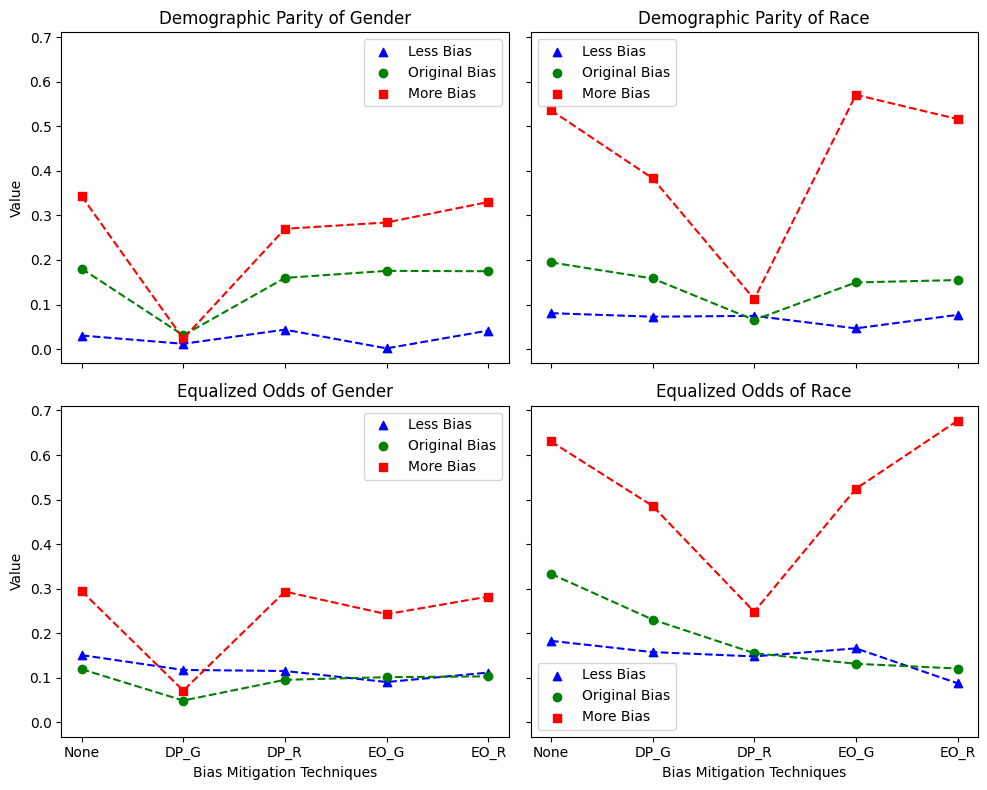

In [ ]:
labels = ["None", "DP_G", "DP_R", "EO_G", "EO_R"]

x_positions = range(len(labels))

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

#Demographic Parity of Gender (top left)
axes[0, 0].scatter(x_positions, dp_g_lb, color='blue', marker='^', label='Less Bias')
axes[0, 0].plot(x_positions, dp_g_lb, color='blue', linestyle='--')
axes[0, 0].scatter(x_positions, dp_g_ob, color='green', marker='o', label='Original Bias')
axes[0, 0].plot(x_positions, dp_g_ob, color='green', linestyle='--')
axes[0, 0].scatter(x_positions, dp_g_mb, color='red', marker='s', label='More Bias')
axes[0, 0].plot(x_positions, dp_g_mb, color='red', linestyle='--')

axes[0, 0].set_xticks(x_positions)
axes[0, 0].set_xticklabels(labels)
axes[0, 0].set_ylabel('Value')
axes[0, 0].set_title('Demographic Parity of Gender')
axes[0, 0].legend()

#Demographic Parity of Race (top right)
axes[0, 1].scatter(x_positions, dp_r_lb, color='blue', marker='^', label='Less Bias')
axes[0, 1].plot(x_positions, dp_r_lb, color='blue', linestyle='--')
axes[0, 1].scatter(x_positions, dp_r_ob, color='green', marker='o', label='Original Bias')
axes[0, 1].plot(x_positions, dp_r_ob, color='green', linestyle='--')
axes[0, 1].scatter(x_positions, dp_r_mb, color='red', marker='s', label='More Bias')
axes[0, 1].plot(x_positions, dp_r_mb, color='red', linestyle='--')

axes[0, 1].set_xticks(x_positions)
axes[0, 1].set_xticklabels(labels)
axes[0, 1].set_title('Demographic Parity of Race')
axes[0, 1].legend()

#Equalized Odds of Gender (bottom left)
axes[1, 0].scatter(x_positions, eo_g_lb, color='blue', marker='^', label='Less Bias')
axes[1, 0].plot(x_positions, eo_g_lb, color='blue', linestyle='--')
axes[1, 0].scatter(x_positions, eo_g_ob, color='green', marker='o', label='Original Bias')
axes[1, 0].plot(x_positions, eo_g_ob, color='green', linestyle='--')
axes[1, 0].scatter(x_positions, eo_g_mb, color='red', marker='s', label='More Bias')
axes[1, 0].plot(x_positions, eo_g_mb, color='red', linestyle='--')

axes[1, 0].set_xticks(x_positions)
axes[1, 0].set_xticklabels(labels)
axes[1, 0].set_xlabel('Bias Mitigation Techniques')
axes[1, 0].set_ylabel('Value')
axes[1, 0].set_title('Equalized Odds of Gender')
axes[1, 0].legend()

#Equalized Odds of Race (bottom right)
axes[1, 1].scatter(x_positions, eo_r_lb, color='blue', marker='^', label='Less Bias')
axes[1, 1].plot(x_positions, eo_r_lb, color='blue', linestyle='--')
axes[1, 1].scatter(x_positions, eo_r_ob, color='green', marker='o', label='Original Bias')
axes[1, 1].plot(x_positions, eo_r_ob, color='green', linestyle='--')
axes[1, 1].scatter(x_positions, eo_r_mb, color='red', marker='s', label='More Bias')
axes[1, 1].plot(x_positions, eo_r_mb, color='red', linestyle='--')

axes[1, 1].set_xticks(x_positions)
axes[1, 1].set_xticklabels(labels)
axes[1, 1].set_xlabel('Bias Mitigation Techniques')
axes[1, 1].set_title('Equalized Odds of Race')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

Comparing Impact of Bias Mitigation Techniques on Accuracy

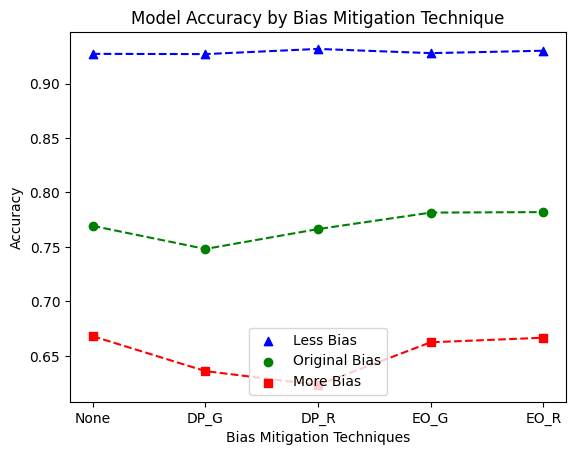

In [ ]:
labels = ["None", "DP_G", "DP_R", "EO_G", "EO_R"]

x_positions = range(len(labels))

#Accuracy
plt.scatter(x_positions, acc_lb, color='blue', marker='^', label='Less Bias')
plt.plot(x_positions, acc_lb, color='blue', linestyle='--')
plt.scatter(x_positions, acc_ob, color='green', marker='o', label='Original Bias')
plt.plot(x_positions, acc_ob, color='green', linestyle='--')
plt.scatter(x_positions, acc_mb, color='red', marker='s', label='More Bias')
plt.plot(x_positions, acc_mb, color='red', linestyle='--')

plt.xticks(x_positions, labels)
plt.ylabel('Accuracy')
plt.xlabel('Bias Mitigation Techniques')
plt.title('Model Accuracy by Bias Mitigation Technique')
plt.legend()
plt.show()

Comparing Impact of Bias in the Dataset on Each Fairness Metric (Demographic Parity for Gender and Race, Equalized Odds for Gender and Race)

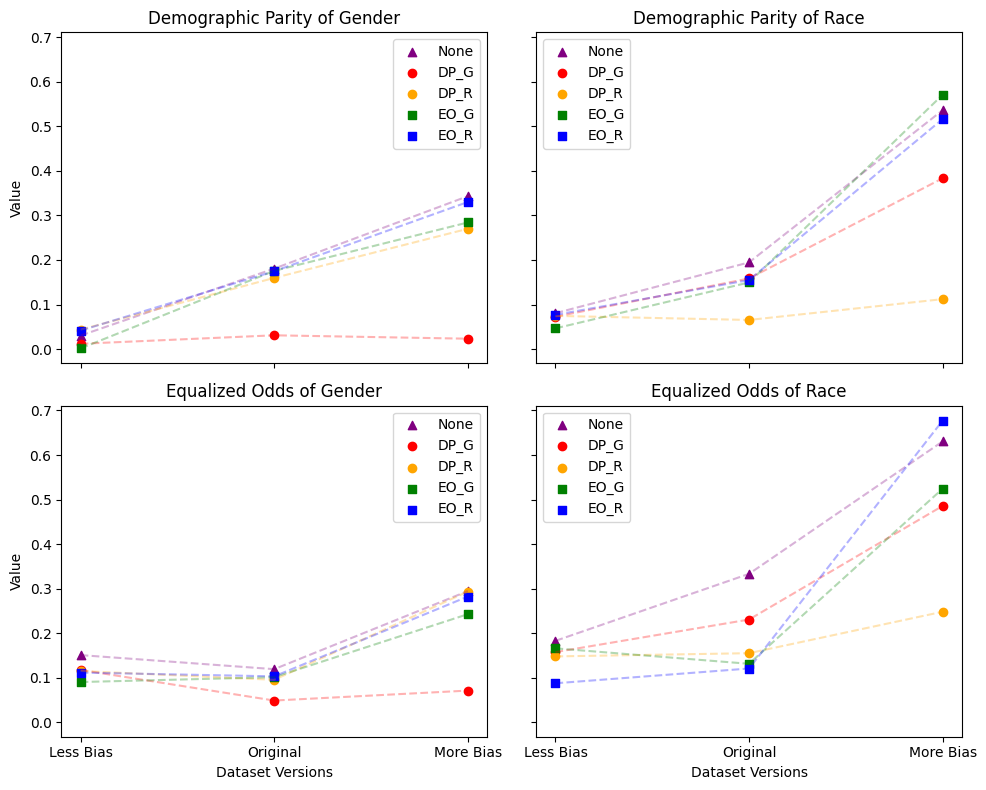

In [ ]:
labels = ["Less Bias", "Original", "More Bias"]

x_positions = range(len(labels))

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

#Demographic Parity of Gender (top left)
axes[0, 0].scatter(x_positions, dp_g, color='purple', marker='^', label='None')
axes[0, 0].plot(x_positions, dp_g, color='purple', linestyle='--', alpha=0.3)
axes[0, 0].scatter(x_positions, dp_egdpg_g, color='red', marker='o', label='DP_G')
axes[0, 0].plot(x_positions, dp_egdpg_g, color='red', linestyle='--', alpha=0.3)
axes[0, 0].scatter(x_positions, dp_egdpr_g, color='orange', marker='o', label='DP_R')
axes[0, 0].plot(x_positions, dp_egdpr_g, color='orange', linestyle='--', alpha=0.3)
axes[0, 0].scatter(x_positions, dp_egeog_g, color='green', marker='s', label='EO_G')
axes[0, 0].plot(x_positions, dp_egeog_g, color='green', linestyle='--', alpha=0.3)
axes[0, 0].scatter(x_positions, dp_egeor_g, color='blue', marker='s', label='EO_R')
axes[0, 0].plot(x_positions, dp_egeor_g, color='blue', linestyle='--', alpha=0.3)

axes[0, 0].set_xticks(x_positions)
axes[0, 0].set_xticklabels(labels)
axes[0, 0].set_ylabel('Value')
axes[0, 0].set_title('Demographic Parity of Gender')
axes[0, 0].legend()

#Demographic Parity of Race (top right)
axes[0, 1].scatter(x_positions, dp_r, color='purple', marker='^', label='None')
axes[0, 1].plot(x_positions, dp_r, color='purple', linestyle='--', alpha=0.3)
axes[0, 1].scatter(x_positions, dp_egdpg_r, color='red', marker='o', label='DP_G')
axes[0, 1].plot(x_positions, dp_egdpg_r, color='red', linestyle='--', alpha=0.3)
axes[0, 1].scatter(x_positions, dp_egdpr_r, color='orange', marker='o', label='DP_R')
axes[0, 1].plot(x_positions, dp_egdpr_r, color='orange', linestyle='--', alpha=0.3)
axes[0, 1].scatter(x_positions, dp_egeog_r, color='green', marker='s', label='EO_G')
axes[0, 1].plot(x_positions, dp_egeog_r, color='green', linestyle='--', alpha=0.3)
axes[0, 1].scatter(x_positions, dp_egeor_r, color='blue', marker='s', label='EO_R')
axes[0, 1].plot(x_positions, dp_egeor_r, color='blue', linestyle='--', alpha=0.3)

axes[0, 1].set_xticks(x_positions)
axes[0, 1].set_xticklabels(labels)
axes[0, 1].set_title('Demographic Parity of Race')
axes[0, 1].legend()

#Equalized Odds of Gender (bottom left)
axes[1, 0].scatter(x_positions, eo_g, color='purple', marker='^', label='None')
axes[1, 0].plot(x_positions, eo_g, color='purple', linestyle='--', alpha=0.3)
axes[1, 0].scatter(x_positions, eo_egdpg_g, color='red', marker='o', label='DP_G')
axes[1, 0].plot(x_positions, eo_egdpg_g, color='red', linestyle='--', alpha=0.3)
axes[1, 0].scatter(x_positions, eo_egdpr_g, color='orange', marker='o', label='DP_R')
axes[1, 0].plot(x_positions, eo_egdpr_g, color='orange', linestyle='--', alpha=0.3)
axes[1, 0].scatter(x_positions, eo_egeog_g, color='green', marker='s', label='EO_G')
axes[1, 0].plot(x_positions, eo_egeog_g, color='green', linestyle='--', alpha=0.3)
axes[1, 0].scatter(x_positions, eo_egeor_g, color='blue', marker='s', label='EO_R')
axes[1, 0].plot(x_positions, eo_egeor_g, color='blue', linestyle='--', alpha=0.3)

axes[1, 0].set_xticks(x_positions)
axes[1, 0].set_xticklabels(labels)
axes[1, 0].set_xlabel('Dataset Versions')
axes[1, 0].set_ylabel('Value')
axes[1, 0].set_title('Equalized Odds of Gender')
axes[1, 0].legend()

#Equalized Odds of Race (bottom right)
axes[1, 1].scatter(x_positions, eo_r, color='purple', marker='^', label='None')
axes[1, 1].plot(x_positions, eo_r, color='purple', linestyle='--', alpha=0.3)
axes[1, 1].scatter(x_positions, eo_egdpg_r, color='red', marker='o', label='DP_G')
axes[1, 1].plot(x_positions, eo_egdpg_r, color='red', linestyle='--', alpha=0.3)
axes[1, 1].scatter(x_positions, eo_egdpr_r, color='orange', marker='o', label='DP_R')
axes[1, 1].plot(x_positions, eo_egdpr_r, color='orange', linestyle='--', alpha=0.3)
axes[1, 1].scatter(x_positions, eo_egeog_r, color='green', marker='s', label='EO_G')
axes[1, 1].plot(x_positions, eo_egeog_r, color='green', linestyle='--', alpha=0.3)
axes[1, 1].scatter(x_positions, eo_egeor_r, color='blue', marker='s', label='EO_R')
axes[1, 1].plot(x_positions, eo_egeor_r, color='blue', linestyle='--', alpha=0.3)

axes[1, 1].set_xticks(x_positions)
axes[1, 1].set_xticklabels(labels)
axes[1, 1].set_xlabel('Dataset Versions')
axes[1, 1].set_title('Equalized Odds of Race')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

Comparing Impact of Bias in the Dataset on Accuracy

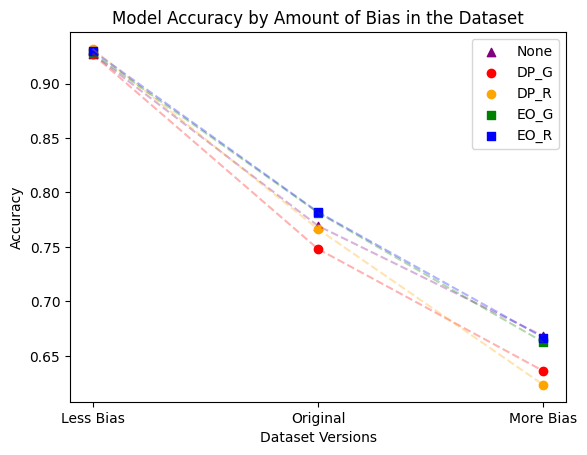

In [ ]:
labels = ["Less Bias", "Original", "More Bias"]

x_positions = range(len(labels))

#Accuracy
plt.scatter(x_positions, acc_1, color='purple', marker='^', label='None')
plt.plot(x_positions, acc_1, color='purple', linestyle='--', alpha=0.3)
plt.scatter(x_positions, acc_egdpg, color='red', marker='o', label='DP_G')
plt.plot(x_positions, acc_egdpg, color='red', linestyle='--', alpha=0.3)
plt.scatter(x_positions, acc_egdpr, color='orange', marker='o', label='DP_R')
plt.plot(x_positions, acc_egdpr, color='orange', linestyle='--', alpha=0.3)
plt.scatter(x_positions, acc_egeog, color='green', marker='s', label='EO_G')
plt.plot(x_positions, acc_egeog, color='green', linestyle='--', alpha=0.3)
plt.scatter(x_positions, acc_egeor, color='blue', marker='s', label='EO_R')
plt.plot(x_positions, acc_egeor, color='blue', linestyle='--', alpha=0.3)

plt.xticks(x_positions, labels)
plt.ylabel('Accuracy')
plt.xlabel('Dataset Versions')
plt.title('Model Accuracy by Amount of Bias in the Dataset')
plt.legend()
plt.show()

Heatmaps for each dataset
- purpose: compare all metrics/techniques in one place
- y: bias mitigation techniques
- x: fairness metrics + accuracy
- z: metrics results

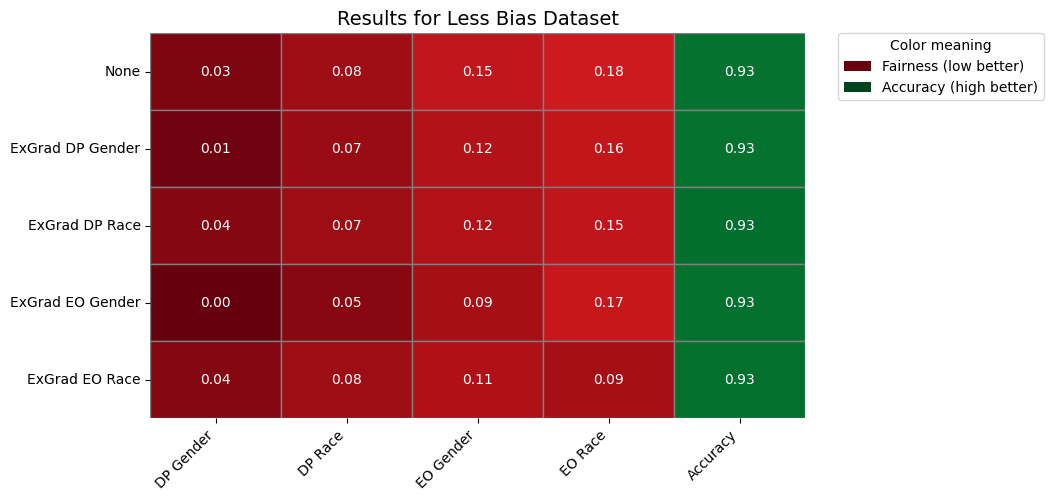

In [ ]:
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.patches import Patch

data = {  #left to right
    "DP Gender": lb_dp_gender,
    "DP Race": lb_dp_race,
    "EO Gender": lb_eo_gender,
    "EO Race": lb_eo_race,
    "Accuracy": lb_acc,
}
index = [  #top to bottom
    "None",
    "ExGrad DP Gender",
    "ExGrad DP Race",
    "ExGrad EO Gender",
    "ExGrad EO Race"
]
df = pd.DataFrame(data, index=index)

# --- Create custom color map matrix ---
fair_norm = Normalize(vmin=0, vmax=0.7)     # lower = better for fairness
acc_norm = Normalize(vmin=0.50, vmax=1.0)  # higher = better for accuracy

fair_cmap = plt.cm.Reds_r
acc_cmap = plt.cm.Greens

colors = df.copy()
for col in df.columns:
    if col == "Accuracy":
        colors[col] = df[col].apply(lambda v: acc_cmap(acc_norm(v)))
    else:
        colors[col] = df[col].apply(lambda v: fair_cmap(fair_norm(v)))

# Convert colors to list of lists for seaborn
color_matrix = colors.values.tolist()

# --- Plot heatmap with manual colors ---
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(
    df,
    annot=True,
    fmt=".2f",
    yticklabels=True,
    xticklabels=True,
    cbar=False,
    square=False,
    linewidths=0.5,
    linecolor='gray',
    ax=ax,
    cmap=None,
    annot_kws={"color": "white"}
)

# Override facecolors
for y in range(df.shape[0]):
    for x in range(df.shape[1]):
        ax.add_patch(plt.Rectangle((x, y), 1, 1, facecolor=color_matrix[y][x], edgecolor='gray'))

# Legend
legend_elements = [
    Patch(facecolor=fair_cmap(0.0), label="Fairness (low better)"),
    Patch(facecolor=acc_cmap(1.0), label="Accuracy (high better)")
]
ax.legend(
    handles=legend_elements,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.,
    title="Color meaning"
)

ax.set_title("Results for Less Bias Dataset", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.subplots_adjust(right=0.78)  # Avoid tight_layout warning
plt.show()


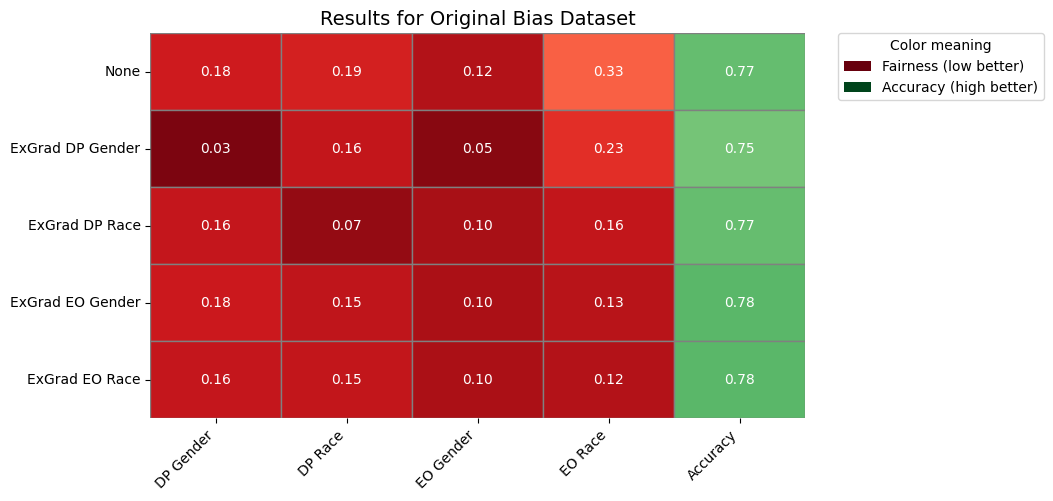

In [ ]:
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.patches import Patch

data = {  #left to right
    "DP Gender": ob_dp_gender,
    "DP Race": ob_dp_race,
    "EO Gender": ob_eo_gender,
    "EO Race": ob_eo_race,
    "Accuracy": ob_acc,
}
index = [  #top to bottom
    "None",
    "ExGrad DP Gender",
    "ExGrad DP Race",
    "ExGrad EO Gender",
    "ExGrad EO Race"
]
df = pd.DataFrame(data, index=index)

# --- Create custom color map matrix ---
fair_norm = Normalize(vmin=0, vmax=0.7)     # lower = better for fairness
acc_norm = Normalize(vmin=0.50, vmax=1.0)  # higher = better for accuracy

fair_cmap = plt.cm.Reds_r
acc_cmap = plt.cm.Greens

colors = df.copy()
for col in df.columns:
    if col == "Accuracy":
        colors[col] = df[col].apply(lambda v: acc_cmap(acc_norm(v)))
    else:
        colors[col] = df[col].apply(lambda v: fair_cmap(fair_norm(v)))

# Convert colors to list of lists for seaborn
color_matrix = colors.values.tolist()

# --- Plot heatmap with manual colors ---
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(
    df,
    annot=True,
    fmt=".2f",
    yticklabels=True,
    xticklabels=True,
    cbar=False,
    square=False,
    linewidths=0.5,
    linecolor='gray',
    ax=ax,
    cmap=None,
    annot_kws={"color": "white"}
)

# Override facecolors
for y in range(df.shape[0]):
    for x in range(df.shape[1]):
        ax.add_patch(plt.Rectangle((x, y), 1, 1, facecolor=color_matrix[y][x], edgecolor='gray'))

# Legend
legend_elements = [
    Patch(facecolor=fair_cmap(0.0), label="Fairness (low better)"),
    Patch(facecolor=acc_cmap(1.0), label="Accuracy (high better)")
]
ax.legend(
    handles=legend_elements,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.,
    title="Color meaning"
)

ax.set_title("Results for Original Bias Dataset", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.subplots_adjust(right=0.78)  # Avoid tight_layout warning
plt.show()


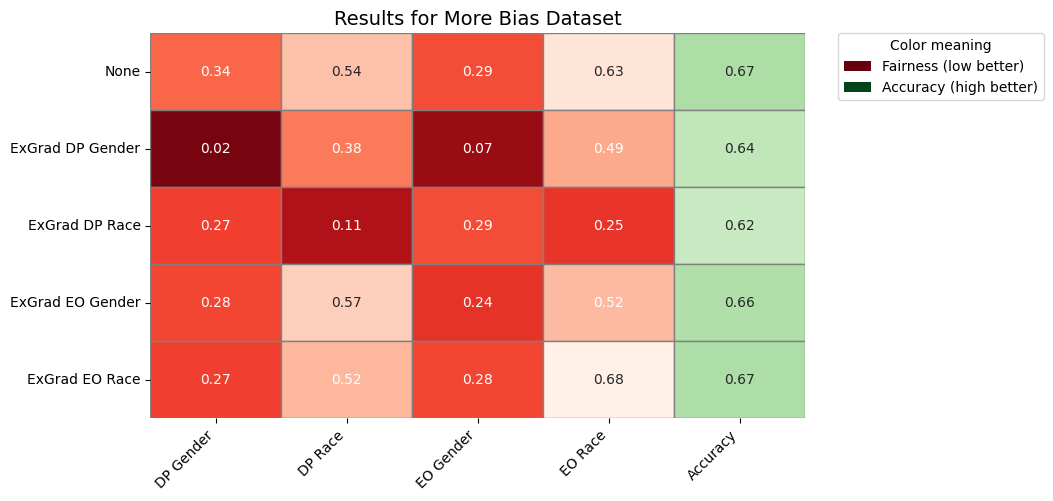

In [ ]:
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.patches import Patch

data = {  #left to right
    "DP Gender": mb_dp_gender,
    "DP Race": mb_dp_race,
    "EO Gender": mb_eo_gender,
    "EO Race": mb_eo_race,
    "Accuracy": mb_acc,
}
index = [  #top to bottom
    "None",
    "ExGrad DP Gender",
    "ExGrad DP Race",
    "ExGrad EO Gender",
    "ExGrad EO Race"
]
df = pd.DataFrame(data, index=index)

# --- Create custom color map matrix ---
fair_norm = Normalize(vmin=0, vmax=0.7)     # lower = better for fairness
acc_norm = Normalize(vmin=0.50, vmax=1.0)  # higher = better for accuracy

fair_cmap = plt.cm.Reds_r
acc_cmap = plt.cm.Greens

colors = df.copy()
for col in df.columns:
    if col == "Accuracy":
        colors[col] = df[col].apply(lambda v: acc_cmap(acc_norm(v)))
    else:
        colors[col] = df[col].apply(lambda v: fair_cmap(fair_norm(v)))

# Convert colors to list of lists for seaborn
color_matrix = colors.values.tolist()

# --- Plot heatmap with manual colors ---
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(
    df,
    annot=True,
    fmt=".2f",
    yticklabels=True,
    xticklabels=True,
    cbar=False,
    square=False,
    linewidths=0.5,
    linecolor='gray',
    ax=ax,
    cmap=None,
)

# Override facecolors
for y in range(df.shape[0]):
    for x in range(df.shape[1]):
        ax.add_patch(plt.Rectangle((x, y), 1, 1, facecolor=color_matrix[y][x], edgecolor='gray'))

# Legend
legend_elements = [
    Patch(facecolor=fair_cmap(0.0), label="Fairness (low better)"),
    Patch(facecolor=acc_cmap(1.0), label="Accuracy (high better)")
]
ax.legend(
    handles=legend_elements,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.,
    title="Color meaning"
)

ax.set_title("Results for More Bias Dataset", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.subplots_adjust(right=0.78)  # Avoid tight_layout warning
plt.show()
